## Data: Online Retail II

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011.The company mainly sells unique all-occasion gift-ware. Many customers of the company are wholesalers.

The dataset can be accessed at the following link: https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci/

Attribute Information:

- InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
- StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.
- Description: Product (item) name. Nominal.
- Quantity: The quantities of each product (item) per transaction. Numeric.
- InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.
- UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£).
- CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.
- Country: Country name. Nominal. The name of the country where a customer resides.

## Business Goals

Market Basket Analysis is a data mining technique employed to discover relationships and patterns within large datasets, particularly in the context of market analysis. By identifying frequently co-occurring items in transactions, businesses can gain valuable insights into customer behavior, optimize product placement, and enhance overall marketing strategies.

## Objectives

1. **Association Rule Discovery**:
    Identify associations and correlations among products or items in a dataset. Discover rules that indicate the likelihood of certain items being bought together.
2. **Cross-Selling Opportunities**:
    Uncover opportunities for cross-selling by understanding which products are frequently purchased together.
4. **Optimizing Product Layout**:
    Arrange products in-store or online in a way that encourages the purchase of related items, creating a more convenient and satisfying shopping experience.

## Methods

### Apriori algorithm 

- We utilize the Apriori algorithm for conducting market basket analysis.
- This algorithm proves highly effective in discerning frequent itemsets and deriving association rules, relying on predefined metrics like support and confidence.
- To execute the Apriori algorithm, we utilize the mlxtend library, a reliable Python library for machine learning extensions.

### Key Metrics

- **Support** 
    - Support measures how frequently an association rule happens in a dataset.
- **Confidence** 
    - Confidence measures how strong an association rule is. 
    - That is to say, in market basket analysis terms, how likely is a second product to be present in the basket if the first is.
    - Confidence(A→B) = Support(A∪B)/Support(A)×100%
    - Confidence(B→A) = Support(A∪B)/Support(B)×100%
- **Lift**
    - Lift measures how much more likely two items are to be bought together compared to being bought individually at random.
    - Lift(A→B)= Support(A∪B)/Support(A)×Support(B)
    - If Lift = 1, it means there is no association between A and B.
    - If Lift > 1, it indicates that A and B are more likely to be bought together than randomly.
    - If Lift < 1, it suggests that A and B are less likely to be bought together than randomly.
- **Leverage**
    - Leverage measures the difference between the observed frequency of A and B occurring together and the frequency that would be expected if A and B were statistically independent.
    - Leverage(A→B)=Support(A∪B)−(Support(A)×Support(B))
    - Positive leverage indicates that the items appear together more frequently than expected by chance.
    - Zero leverage means the items occur together exactly as expected based on their individual supports.
    - Negative leverage implies the items co-occur less frequently than expected.
    
- **Conviction**
    - Conviction measures the ratio of the expected frequency that A occurs without B to the frequency that A occurs when B is present.
    - Conviction(A→B)= 1−Support(B)/1−Confidence(A→B)
    - Conviction(B→A)= 1−Support(A)/1−Confidence(B→A)
    - If Conviction = 1, it means that A and B are independent of each other.
    - If Conviction > 1, it suggests that the presence of B has increased the likelihood of A, indicating a strong association.
    - If Conviction < 1, it indicates a negative association between A and B.
- **Zhang’s metric**
    - Measure that looks not only at positive associations, but also negative. It can says, for instances, if buying A makes someone NOT buy B.
    - Value: < 0 if there’s a negative association (dissociation), > 0 if there’s a positive association where -1 and 1 are the extreme values.

## Environment Setup

In [224]:
# ◯ Paso 1: Importar bibliotecas del sistema operativo y expresiones regulares
import os                    # permite interactuar con el sistema de archivos (por ejemplo, para leer rutas, archivos, etc.)
import re                    # módulo para trabajar con expresiones regulares, útil para búsquedas o limpiezas complejas de texto
import sys                   # Permite manipular el entorno de ejecución de Python (paths, argumentos, etc.)

# ✓ Agregar la ruta al directorio raíz del proyecto para que se puedan importar módulos personalizados (como 'networks')
sys.path.append(os.path.abspath(".."))      # Esto le indica a Python que también busque módulos en el directorio raíz de tu proyecto.

# ◯ Paso 2: Importar bibliotecas de análisis de datos

import pandas as pd          # manipulación de estructuras de datos (DataFrames)
import numpy as np           # operaciones matemáticas eficientes con matrices y vectores

# ◯ Paso 3: Importar bibliotecas de visualización
import plotly.express as px  # librería interactiva para gráficos (barras, dispersión, líneas, etc.)
import networkx as nx        # usada para construir y visualizar grafos (ideal para reglas de asociación o redes de productos)

# ◯ Paso 4: Importar utilidades para manejar datos complejos
import json                 # permite cargar y guardar datos en formato JSON (muy útil para configuración o exportación)
import copy                 # permite realizar copias profundas de estructuras de datos complejas (para evitar modificaciones indeseadas)

In [225]:
# ◯ Paso 5: Importar módulos del paquete mlxtend para minería de patrones frecuentes

# ✓ apriori:
#   - Algoritmo que permite identificar conjuntos de ítems frecuentes en transacciones.
#   - Se basa en el soporte mínimo para filtrar combinaciones relevantes.
from mlxtend.frequent_patterns import apriori

# ✓ association_rules:
#   - Genera reglas de asociación a partir de los ítems frecuentes.
#   - Calcula métricas como lift, confidence, support, leverage, conviction, etc.
from mlxtend.frequent_patterns import association_rules

# ✓ TransactionEncoder:
#   - Transforma listas de transacciones (lista de listas) en un formato de matriz binaria.
#   - Necesario para aplicar el algoritmo Apriori en formato correcto (DataFrame booleano).
from mlxtend.preprocessing import TransactionEncoder

In [226]:
# ◯ Paso 6: Importar clases personalizadas del proyecto para construir y visualizar redes de productos

# ✓ RulesGraphManager:
#   - Clase encargada de construir un grafo desde las reglas de asociación.
#   - Administra nodos, pesos y relaciones para visualización o análisis estructural.
from networks.RulesGraphManager import RulesGraphManager as RGM

# ✓ ProductNetwork:
#   - Construye una red de co-ocurrencia entre productos.
#   - Se puede usar para analizar centralidad, agrupaciones, o rutas entre ítems.
from networks.ProductNetwork import ProductNetwork

# ✓ CrossSellingProducts:
#   - Implementa lógica para detectar oportunidades de venta cruzada (cross-selling).
#   - Utiliza reglas de asociación y métricas de soporte/confianza para sugerencias comerciales.
from networks.CrossSellingProducts import CrossSellingProducts

In [227]:
# ◯ Paso 7: Importar módulos para agrupar nodos y construir clusters

# ✓ NxGrouper:
#   - Agrupa nodos de un grafo usando algoritmos de agrupamiento (community detection, modularidad, etc.).
#   - Ideal para resaltar grupos de productos que aparecen frecuentemente juntos.
from grouper.NxGrouper import NxGrouper


# ◯ Paso 8: Importar módulos para visualización en forma de tablas y mapas de calor

# ✓ HeatmapCrosstab:
#   - Genera un heatmap basado en una tabla cruzada de productos o métricas (por ejemplo, co-ocurrencia).
#   - Útil para mostrar la intensidad de relación entre productos de forma matricial.
from charts.HeatmapXTab import HeatmapCrosstab

In [228]:
# ◯ Paso 9: Importar módulos de visualización interactiva con ECharts (JS embebido en Jupyter o Streamlit)

# ✓ EgraphForce:
#   - Muestra grafos con layout de fuerzas (force-directed graph).
#   - Ideal para ver agrupamientos naturales en la red de productos.
from echarts.EgraphForce import EgraphForce

# ✓ EgraphStandard:
#   - Visualización de grafos más clásica (sin fuerzas), útil para control de diseño más rígido.
from echarts.EgraphStandard import EgraphStandard

# ✓ JupyterEcharts:
#   - Motor para renderizar visualizaciones ECharts dentro de notebooks Jupyter.
#   - Se usa como puente para mostrar gráficos de tipo `EgraphForce` o `EgraphStandard`.
from echarts.JupyterEcharts import JupyterEcharts

In [229]:
# ◯ Paso 10: Configurar la visualización de DataFrames en Pandas

# ✓ Mostrar hasta 100 filas cuando se imprime un DataFrame
#   - Por defecto Pandas muestra solo 10 o 20.
#   - Esto permite ver más resultados directamente sin truncamiento.
pd.set_option('display.max_rows', 100)

# ✓ Mostrar el contenido completo de las celdas (sin cortar con "...")
#   - Es útil cuando las columnas contienen textos largos o listas.
#   - 'None' desactiva el límite de caracteres por columna.
pd.set_option('display.max_colwidth', None)


pd.set_option('display.float_format', '{:.4f}'.format)

## Data Preparation

### Load Dataset

In [230]:
# ◯ Paso 11: Construir la ruta al archivo CSV

# ✓ Combina de forma segura las partes de una ruta de archivo (compatible con diferentes sistemas operativos)
#   - En este caso: "F:\Data\datas" + "online_retail_II.csv"
#   - Devuelve una ruta completa: "F:\Data\datas\online_retail_II.csv"
base_dir = '/workspaces/Final_Project_MBA'
path_dataset = os.path.join(base_dir, "data/processed", "online_retail_II_translated.csv")
print(path_dataset)

# ◯ Paso 12:  Cargar dataset traducido con nombres de productos en español desde el archivo online_retail_II_translated.csv 
    # Este archivo fue generado a partir de 'online_retail_II.csv':
    #    - La columna original 'Description' fue renombrada a 'description_en'
    #    - Se agregó una nueva columna 'description' en español usando un diccionario traducido manualmente a 
    #      partir del notebook build_translated_dataset.ipynb
    #    - Esto permite mantener toda la lógica del análisis sin modificar las referencias a 'description'

# ✓ Lee el archivo CSV ubicado en la ruta 'path_dataset'

df_raw = pd.read_csv(path_dataset)
dataset_sample = df_raw.head(10).drop(columns=["description_en"])

# 📁 GUARDAR SAMPLE DEL DATASET EN UN ARCHIVO CSV
# ✓ Guarda una muestra del DataFrame en un archivo CSV para verificar la carga.head(10)  # Muestra las primeras 5 filas del DataFrame para verificar que se haya cargado correctamente
dataset_sample.to_csv(os.path.join(base_dir, "data/processed", "00_dataset_sample.csv"), index=False)
dataset_sample

/workspaces/Final_Project_MBA/data/processed/online_retail_II_translated.csv


,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Description
0,489434,85048,12,2009-12-01 07:45:00,6.9500,13085.0000,United Kingdom,BOLA DE CRISTAL DE NAVIDAD DE 15CM 20 LUCES
1,489434,79323P,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom,LUCES DE CEREZA ROSA
2,489434,79323W,12,2009-12-01 07:45:00,6.7500,13085.0000,United Kingdom,LUCES DE CEREZA BLANCA
3,489434,22041,48,2009-12-01 07:45:00,2.1000,13085.0000,United Kingdom,"MARCO DE GRABACIÓN DE 7"" TAMAÑO INDIVIDUAL"
4,489434,21232,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom,CAJA DE BARATIJAS DE CERÁMICA DE FRESA
5,489434,22064,24,2009-12-01 07:45:00,1.6500,13085.0000,United Kingdom,OLLA DE BARATIJAS DE ROSQUILLA ROSA
6,489434,21871,24,2009-12-01 07:45:00,1.2500,13085.0000,United Kingdom,TAZA SALVAR EL PLANETA
7,489434,21523,10,2009-12-01 07:45:00,5.9500,13085.0000,United Kingdom,FELPUDO DE LUJO PARA EL HOGAR DULCE HOGAR
8,489435,22350,12,2009-12-01 07:46:00,2.5500,13085.0000,United Kingdom,CUENCO GATO
9,489435,22349,12,2009-12-01 07:46:00,3.7500,13085.0000,United Kingdom,"CUENCO PARA PERROS, DISEÑO DE LA BOLA DE PERSECUCIÓN"


In [231]:
# ✓ Solo carga las columnas 'Invoice' y 'Description' para reducir memoria y enfocar el análisis
#   - 'Invoice': identificador de cada transacción
#   - 'Description': nombre del producto comprado
df = pd.read_csv(path_dataset, usecols=['Invoice', 'Description'])

In [232]:
df.shape

(1067371, 2)

In [233]:
df.head()

,Invoice,Description
0,489434,BOLA DE CRISTAL DE NAVIDAD DE 15CM 20 LUCES
1,489434,LUCES DE CEREZA ROSA
2,489434,LUCES DE CEREZA BLANCA
3,489434,"MARCO DE GRABACIÓN DE 7"" TAMAÑO INDIVIDUAL"
4,489434,CAJA DE BARATIJAS DE CERÁMICA DE FRESA


### Data Cleaning

#### Drop missing values

In [234]:
# ◯ Paso 13: Verificar valores nulos (NaN) en el DataFrame

# ✓ df.isna(): genera un DataFrame booleano con True donde hay valores nulos (NaN) y False en el resto
# ✓ .sum(): suma los True columna por columna, devolviendo la cantidad total de valores faltantes por columna
df.isna().sum()


Invoice           0
Description    4382
dtype: int64

In [235]:
# ◯ Paso 14: Eliminar filas que contienen valores nulos en cualquier columna

# ✓ dropna(): elimina todas las filas del DataFrame que tengan al menos un valor NaN (nulo)
# ✓ Al reasignar el resultado a 'df', actualizamos el DataFrame original con la versión limpia
df = df.dropna()
df.shape

(1062989, 2)

#### Trim space in description column

In [236]:
# ◯ Paso 15: Limpiar texto en la columna 'Description'

# ✓ .str.strip():
#   - Elimina espacios en blanco al inicio y al final de cada descripción de producto.
#   - Ejemplo: "  RED T-SHIRT  " → "RED T-SHIRT"
df['Description'] = df['Description'].str.strip()


# ✓ .replace(r'\s{2,}', ' ', regex=True):
#   - Reemplaza cualquier secuencia de 2 o más espacios internos por un solo espacio
#   - r'\s{2,}' es una expresión regular: busca espacios repetidos
#   - Esto ayuda a estandarizar nombres de productos como "RED    T-SHIRT" → "RED T-SHIRT"
df['Description'] = df['Description'].replace(r'\s{2,}', ' ', regex=True)

#### Drop duplicate rows

There are two possible reasons for duplicate rows. 
1. The cashier might have scanned each product individually instead of scanning once and entering the quantity, resulting in multiple entries for each product on the invoice. 
2. The cashier might have accidentally scanned the same product twice. 

- **Decision process**: 
    - The first scenario is more common, so we assume that the duplicate rows are not mistakes.
    - But, since Apriori algorithm assumes that each item in each transaction is a binary occurrence, meaning it considers whether an item is present or not, but not the quantity of the item, so we decide to drop duplicate rows.
<br>
- **Action**: We drop duplicate rows

In [237]:
# ◯ Paso 16: Contar la cantidad de filas duplicadas en el DataFrame

# ✓ df.duplicated():
#   - Devuelve una Serie booleana: True si la fila está duplicada (misma combinación de valores en todas las columnas)
#   - Por defecto compara todas las columnas

# ✓ df.loc[...]: selecciona solo las filas que están duplicadas

# ✓ .shape: devuelve una tupla con (número de filas, número de columnas)
#   - Al usarlo sobre df.loc[duplicated()], obtenemos cuántas filas están duplicadas

df.loc[df.duplicated()].shape

(46998, 2)

In [238]:
# ◯ Paso 17: Eliminar filas duplicadas del DataFrame

df = df.drop_duplicates()

In [239]:
df.shape

(1015991, 2)

#### Drop cancelation invoice rows

In [240]:
# ◯ Paso 18: Contar filas correspondientes a facturas canceladas

# ✓ df['Invoice'].str.startswith('C'):
#   - Verifica si el valor en la columna 'Invoice' comienza con la letra 'C'
#   - Devuelve una Serie booleana: True si la factura es de tipo cancelación

# ✓ df[...]:
#   - Filtra el DataFrame y devuelve solo las filas con facturas canceladas

# ✓ .shape:
#   - Devuelve una tupla con (número de filas, número de columnas)
#   - Sirve para contar cuántas filas corresponden a cancelaciones

df[df['Invoice'].str.startswith('C')].shape

(18900, 2)

In [241]:
# ◯ Paso 19: Eliminar facturas canceladas del DataFrame

#   - El operador ~ invierte los booleanos: deja solo las facturas que **no** son canceladas

df = df[~df['Invoice'].str.startswith('C')]
df

,Invoice,Description
0,489434,BOLA DE CRISTAL DE NAVIDAD DE 15CM 20 LUCES
1,489434,LUCES DE CEREZA ROSA
2,489434,LUCES DE CEREZA BLANCA
3,489434,"MARCO DE GRABACIÓN DE 7"" TAMAÑO INDIVIDUAL"
4,489434,CAJA DE BARATIJAS DE CERÁMICA DE FRESA
...,...,...
1067366,581587,DELANTAL INFANTIL DOLLY GIRL
1067367,581587,CUBIERTOS INFANTILES DOLLY GIRL
1067368,581587,CUCHILLERÍA INFANTIL DESFILE CIRCENSE
1067369,581587,SET DE HORNEADO 9 PIEZAS RETROSPOT


In [242]:
df.shape

(997091, 2)

In [310]:
df_before_encoding = df.copy()
top_10_products = df_before_encoding['Description'].value_counts().head(10)

# 📁 Guardar top 10 products (LOS 10 PRODUCTOS MAS VENDIDOS)
ruta_guardado = os.path.join(base_dir, "data", "processed", "Top_10_Mas_Vendidos.csv")
top_10_products.to_csv(ruta_guardado)


# nombres de columnas al exportar
top_10_products_df = top_10_products.reset_index()
top_10_products_df.columns = ['Producto', 'Unidades Vendidas']
top_10_products_df.to_csv(ruta_guardado, index=False)
display(top_10_products_df)


,Producto,Unidades Vendidas
0,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,5460
1,SOPORTE DE PASTELES REGENCY 3 NIVELES,3920
2,BOLSO JUMBO ROJO RETROSPOT,3273
3,ADORNO DE PÁJARO DE COLORES VARIADOS,2808
4,BANDERINES FESTIVOS,2676
5,BOLSA DE ALMUERZO SUKI DESIGN,2364
6,LONCHERA CALAVERA NEGRA.,2351
7,BOLSA DE ALMACENAMIENTO JUMBO SUKI,2330
8,CAJA DE BARATIJAS DE CERÁMICA DE FRESA,2310
9,JUMBO SHOPPER VINTAGE PAISLEY ROJO,2193


### Data Encoding

Empezamos a preparar el dataset para convertirlo en formato transaccional — paso previo al uso de TransactionEncoder.  
¿Por qué convertir en listas?

Porque en el siguiente paso vas a agrupar por Invoice y sumar las listas de productos por factura:

transactions = dfs.groupby('Invoice')['Description'].sum().tolist()

Esto te da una estructura como:
[
  ['TOY CAR', 'BALL', 'BAG'],
  ['RIBBON', 'CANDLE'],
  ...
]

[
  ['TOY CAR', 'BALL', 'BAG'],
  ['RIBBON', 'CANDLE'],
  ...
]

La cual es ideal para usar con TransactionEncoder.

In [244]:
# ◯ Paso 20: Crear una copia del DataFrame y transformar la columna 'Description' en listas

# ✓ df.copy():
#   - Se crea una copia completa del DataFrame original para trabajar sin modificar el original directamente
dfs = df.copy()

# ✓ .transform(lambda x: [x]):
#   - Convierte cada valor de la columna 'Description' en una lista con un solo elemento
#   - Ejemplo: "TOY CAR" → ["TOY CAR"]
#   - Esto es útil para luego hacer un agrupamiento por factura y concatenar listas de productos

dfs['Description'] = dfs['Description'].transform(lambda x: [x])
dfs

,Invoice,Description
0,489434,[BOLA DE CRISTAL DE NAVIDAD DE 15CM 20 LUCES]
1,489434,[LUCES DE CEREZA ROSA]
2,489434,[LUCES DE CEREZA BLANCA]
3,489434,"[MARCO DE GRABACIÓN DE 7"" TAMAÑO INDIVIDUAL]"
4,489434,[CAJA DE BARATIJAS DE CERÁMICA DE FRESA]
...,...,...
1067366,581587,[DELANTAL INFANTIL DOLLY GIRL]
1067367,581587,[CUBIERTOS INFANTILES DOLLY GIRL]
1067368,581587,[CUCHILLERÍA INFANTIL DESFILE CIRCENSE]
1067369,581587,[SET DE HORNEADO 9 PIEZAS RETROSPOT]


In [245]:
# ◯ Paso 21: Agrupar productos por factura para construir las transacciones

# ✓ dfs.groupby('Invoice')['Description'].sum():
#   - Agrupa el DataFrame por la columna 'Invoice'
#   - Suma las listas de productos de cada factura (recordá que ya convertimos cada descripción en una lista en el paso anterior)
#   - Al sumar listas, se concatenan (por ejemplo: ['A'] + ['B'] → ['A', 'B'])
#   - Resultado: Serie donde cada fila es una factura, y su valor es una lista de productos comprados en esa factura


dfs = dfs.groupby('Invoice')['Description'].sum()  # usamos esto porque ya eliminamos duplicados antes
dfs

# dfs = dfs.groupby('Invoice')['Description'].sum().map(lambda x: list(set(x)))
    # Esta línea remueve productos repetidos dentro de la misma factura usando set(x).
    # Luego convierte de nuevo a lista para mantener el formato.
    # Esto es útil si querés que cada producto aparezca una sola vez por factura (sin repetir), pero 
    # puede alterar el soporte real si en el análisis te importa la cantidad de veces que se compró un ítem en la misma transacción.


# df.groupby('Invoice')['Description'].unique() # this code is slow
    # Esto también quita duplicados, pero usando unique() que devuelve un np.array de valores únicos por factura.
    # puede ser más lento en DataFrames grandes, especialmente si se usan muchos objetos.

Invoice
489434                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               [BOLA DE CRISTAL DE NAVIDAD DE 15CM 20 LUCES, LUCES DE CEREZA ROSA, LUCES DE CEREZA BLANCA, MARCO DE GRABACIÓN DE 7" TAMAÑO INDIVIDUAL, CAJA DE BARATIJAS DE CERÁMICA DE FRESA, OLLA DE BARATIJAS DE ROSQUILLA ROSA, TAZA SALVAR EL PLANETA, FELPUDO DE LUJO PARA EL HOGAR DULCE HOGAR]
489435                                                                                                                                                                                             

In [246]:
# ◯ Paso 22: Preparar codificación binaria de transacciones para usar en Apriori

# ✓ Instanciamos un codificador de transacciones de mlxtend
#   - Este encoder convierte listas de productos por factura en una matriz booleana
#   - Cada columna será un producto, y cada fila representará una transacción
encoder = TransactionEncoder()

# ✓ Ajustamos el encoder al conjunto de transacciones 'dfs'
#   - .fit(dfs): detecta todos los productos únicos del dataset
#   - .transform(dfs): convierte cada transacción (lista de productos) en una fila de presencia/ausencia (True/False)
df_encoder = encoder.fit(dfs).transform(dfs)

In [247]:
# ◯ Paso 23: Visualizar las primeras 5 transacciones codificadas

# ✓ df_encoder[:5]:
#   - Muestra las primeras 5 filas del array codificado
#   - Cada fila representa una transacción
#   - Cada columna representa un producto
#   - El valor es booleano (True/False) indicando si el producto está presente en la transacción

df_encoder[:5]

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [248]:
# ◯ Paso 24: Convertir la matriz booleana codificada a un DataFrame con nombres de productos

# ✓ df_encoder: matriz NumPy con True/False indicando si cada producto está presente en una transacción
# ✓ encoder.columns_: lista de nombres de los productos, en el mismo orden que las columnas de df_encoder

# ✓ Creamos un nuevo DataFrame llamado one_hot_transactions
#   - Cada fila es una transacción
#   - Cada columna es un producto
#   - True indica que el producto está presente en esa transacción


one_hot_transactions = pd.DataFrame(df_encoder, columns=encoder.columns_)

In [249]:
one_hot_transactions.head()

,* Bola de espejo de oficina USB,* Lámpara de brillo de oficina USB,*Boombox Ipod Clásico,12 ADORNOS NAVIDEÑOS DE ZINC ASS,12 CASA DE HUEVOS MADERA PINTADA,12 CLAVIJAS DE MARGARITA EN CAJA DE MADERA,12 CUBIERTOS DE CLAVIJA DE ROSA ROSA,12 CUBIERTOS DE CLAVIJAS DE ROSA MARFIL,12 CUBIERTOS DE CLAVIJAS DE ROSA ROJA,12 GALLINA ROSA + POLLITOS EN CANASTA,...,ÁRBOL DE PASCUA PÁJAROS AMARILLOS,ÁRBOL DE PLUMAS DE GANSO BLANCO 60CM,ÁRBOL DE PLUMAS DE GANSO ROSA 60CM,ÁRBOL DE PLUMAS DE OCA VERDE 60CM,ÁRBOL DE ROMPECABEZAS CON PAJARERA,ÁRBOL DE ZINC MUSICAL DE NAVIDAD,ÁRBOL MÁGICO - FLORES DE PAPEL,ÁRBOL RETROSPOT DE NAVIDAD MADERA,Óxido corregido,"óxido, conjuntos faltantes, etc."
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Data Mining (Rules Extraction)

- The following parameters are configured for the algorithm:
    - Maximum Combination Length
        - We set the maximum combination length to 2 items.
        - This choice is made to focus on pairs of items, allowing for a more targeted analysis of co-occurrences.
    - Minimum Occurance Product
        - We set the minimum support threshold at 1% to focus on the most commonly purchased products
    - Minimum Co-Occurrence Support Threshold        
        - A minimum co-occurrence support threshold of 1% is established to filter out infrequent itemsets. 
        - This ensures that only associations with a significant presence in the dataset are considered.

In [250]:
# ◯ Paso 25: Aplicar el algoritmo Apriori para encontrar conjuntos de productos frecuentes

frequent_itemsets = apriori(
    one_hot_transactions,       # DataFrame binario donde cada fila es una transacción y cada columna un producto
    min_support=0.01,           # conserva solo los ítems o combinaciones presentes en al menos el 1% de las transacciones
    use_colnames=True,          # muestra los nombres reales de los productos en lugar de sus índices
    max_len=2,                  # limita los conjuntos frecuentes a pares de productos como máximo
    low_memory=True             # usa menos memoria (útil en datasets grandes, pero puede ser más lento)
)

# ◯ Paso 26: Generar reglas de asociación a partir de los conjuntos frecuentes

rules = association_rules(
    frequent_itemsets,          # resultado del algoritmo apriori con soporte mínimo aplicado
    metric="support",           # la métrica principal que define si se genera una regla es el soporte
    min_threshold=0.01          # genera reglas solo si el soporte de la combinación es al menos 1%
)

rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SOPORTE DE PASTELES REGENCY 3 NIVELES),(6 CINTAS ENCANTO RÚSTICO),0.0955,0.0426,0.0109,0.1143,2.6800,0.0068,1.0809
1,(6 CINTAS ENCANTO RÚSTICO),(SOPORTE DE PASTELES REGENCY 3 NIVELES),0.0426,0.0955,0.0109,0.2559,2.6800,0.0068,1.2155
2,(SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO),(6 CINTAS ENCANTO RÚSTICO),0.1330,0.0426,0.0121,0.0908,2.1303,0.0064,1.0530
3,(6 CINTAS ENCANTO RÚSTICO),(SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO),0.0426,0.1330,0.0121,0.2833,2.1303,0.0064,1.2097
4,(60 CAJAS DE TARTAS VINTAGE NAVIDAD),(KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50),0.0253,0.0491,0.0100,0.3956,8.0489,0.0088,1.5731
...,...,...,...,...,...,...,...,...,...
643,(TIRITAS EN CALAVERAS DE HOJALATA),(TIRITAS EN HOJALATA SPACEBOY),0.0266,0.0316,0.0105,0.3941,12.4585,0.0096,1.5983
644,(TIRITAS EN HOJALATA STRONGMAN),(TIRITAS EN HOJALATA SPACEBOY),0.0233,0.0316,0.0101,0.4351,13.7548,0.0094,1.7144
645,(TIRITAS EN HOJALATA SPACEBOY),(TIRITAS EN HOJALATA STRONGMAN),0.0316,0.0233,0.0101,0.3202,13.7548,0.0094,1.4369
646,(TIROS EN HOJALATA VINTAGE PAISLEY),(TIRITAS EN HOJALATA SPACEBOY),0.0274,0.0316,0.0110,0.4005,12.6607,0.0101,1.6154


In [251]:
# ❄️ ¿Qué es un frozenset en Python?

# Un frozenset es una colección inmutable de elementos únicos.
# Es similar a un set, pero no se puede modificar una vez creado.
# Se usa cuando necesitás que el conjunto sea hashable (por ejemplo, como clave en un diccionario).

# 🔁 Comparación rápida entre set y frozenset

# Un set (mutable)
s = set(['A', 'B'])
s.add('C')         # ✅ permitido

# Un frozenset (inmutable)
fs = frozenset(['A', 'B'])
# fs.add('C')      # ❌ AttributeError: 'frozenset' object has no attribute 'add'

# 🔍 ¿Por qué se usa frozenset en association_rules()?

# Las columnas 'antecedents' y 'consequents' del DataFrame generado por mlxtend
# contienen combinaciones de productos representadas como frozensets.

# Esto asegura que:
# ✓ No haya productos repetidos dentro de una misma combinación
# ✓ La estructura sea inmutable (no modificable)
# ✓ Se puedan comparar fácilmente combinaciones como objetos únicos

# Ejemplo de frozenset en una regla de asociación:
# frozenset({'MUG', 'BAG'})  → Representa que MUG y BAG fueron comprados juntos

# 🧼 Por qué convertirlos a strings:
# El formato frozenset no es muy legible al mostrar resultados o exportar.
# Por eso, se transforma en algo más amigable, como: 'MUG, BAG'

# Ejemplo de conversión:
# ', '.join(frozenset({'MUG', 'BAG'})) → 'MUG, BAG'


In [252]:
# ◯ Paso 27: Convertir 'antecedents' y 'consequents' a strings legibles en vez de conjuntos (tipo frozenset).

# ✓ Por defecto, estas columnas contienen frozensets (por ejemplo: frozenset({'MUG'}))
# ✓ map(lambda x: ''.join(list(x))):
#     - Convierte el conjunto en una lista (ej.: ['MUG'])
#     - Luego la une como string sin separador (ej.: 'MUG')
# ✓ Esto es útil para visualización o exportación a CSV

rules['antecedents'] = rules['antecedents'].map(lambda x: ''.join(list(x)))
rules['consequents'] = rules['consequents'].map(lambda x: ''.join(list(x)))

In [253]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,SOPORTE DE PASTELES REGENCY 3 NIVELES,6 CINTAS ENCANTO RÚSTICO,0.0955,0.0426,0.0109,0.1143,2.6800,0.0068,1.0809
1,6 CINTAS ENCANTO RÚSTICO,SOPORTE DE PASTELES REGENCY 3 NIVELES,0.0426,0.0955,0.0109,0.2559,2.6800,0.0068,1.2155
2,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,6 CINTAS ENCANTO RÚSTICO,0.1330,0.0426,0.0121,0.0908,2.1303,0.0064,1.0530
3,6 CINTAS ENCANTO RÚSTICO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,0.0426,0.1330,0.0121,0.2833,2.1303,0.0064,1.2097
4,60 CAJAS DE TARTAS VINTAGE NAVIDAD,KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50,0.0253,0.0491,0.0100,0.3956,8.0489,0.0088,1.5731
...,...,...,...,...,...,...,...,...,...
643,TIRITAS EN CALAVERAS DE HOJALATA,TIRITAS EN HOJALATA SPACEBOY,0.0266,0.0316,0.0105,0.3941,12.4585,0.0096,1.5983
644,TIRITAS EN HOJALATA STRONGMAN,TIRITAS EN HOJALATA SPACEBOY,0.0233,0.0316,0.0101,0.4351,13.7548,0.0094,1.7144
645,TIRITAS EN HOJALATA SPACEBOY,TIRITAS EN HOJALATA STRONGMAN,0.0316,0.0233,0.0101,0.3202,13.7548,0.0094,1.4369
646,TIROS EN HOJALATA VINTAGE PAISLEY,TIRITAS EN HOJALATA SPACEBOY,0.0274,0.0316,0.0110,0.4005,12.6607,0.0101,1.6154


In [254]:
rules.shape

(648, 9)

In [255]:
# ◯ Paso 28: Ordenar las reglas por soporte para ver cuáles ocurren con mayor frecuencia y mostrar las 5 más frecuentes

# ✓ rules.sort_values('support', ascending=False):
#   - Ordena el DataFrame de reglas de asociación de mayor a menor según la métrica 'support'
#   - El soporte indica la proporción de transacciones que contienen tanto el antecedente como el consecuente

# ✓ .head(5):
#   - Muestra las primeras 5 reglas del resultado ordenado
#   - Estas serán las combinaciones más frecuentes en el dataset

rules.sort_values('support', ascending=False).head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
623,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,0.0429,0.1330,0.0302,0.7045,5.2984,0.0245,2.9346
622,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,0.1330,0.0429,0.0302,0.2271,5.2984,0.0245,1.2384
524,MARCO DE MADERA ACABADO BLANCO,MARCO DE MADERA BLANCO ANTIGUO,0.0489,0.0501,0.0271,0.5553,11.0746,0.0247,2.1361
525,MARCO DE MADERA BLANCO ANTIGUO,MARCO DE MADERA ACABADO BLANCO,0.0501,0.0489,0.0271,0.5410,11.0746,0.0247,2.0724
122,BOLSA DE ALMACENAMIENTO JUMBO SUKI,BOLSO JUMBO ROJO RETROSPOT,0.0567,0.0797,0.0267,0.4704,5.9012,0.0222,1.7377


In [256]:
# ◯ Paso 29: Ordenar las reglas por confianza y mostrar las 5 más fuertes

# Ordenamos las reglas de asociación según la métrica confidence, que mide qué tan probable es que el 
# consequent ocurra dado que ocurrió el antecedent.


# ✓ rules.sort_values('confidence', ascending=False):
#   - Ordena las reglas de asociación de mayor a menor según la métrica 'confidence'
#   - La confianza mide la probabilidad de que ocurra el 'consequent' dado que ocurrió el 'antecedent'
#   - Ejemplo: si A → B tiene una confianza de 0.85, significa que en el 85% de los casos donde se compró A, también se compró B

# ✓ .head(5):
#   - Muestra las 5 reglas con mayor poder predictivo

rules.sort_values('confidence', ascending=False).head(5)


# ¿Por qué es útil?
# Porque muestra las reglas con mayor fuerza condicional: si alguien compra el producto A, 
# ¿qué tan probable es que también compre el producto B?
#     Ejemplo práctico:
#     'MUG' → 'TEA INFUSER' con confidence = 0.92 significa que el 92% de quienes compraron MUG también compraron el infusor.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
492,SALÓN DE LA CASA DE JUEGOS DE POPPY,LA COCINA DE POPPY'S PLAYHOUSE,0.0137,0.0181,0.0115,0.8404,46.5077,0.0113,6.1534
637,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0250,0.0327,0.0208,0.8341,25.5033,0.0200,5.8322
440,SALÓN DE LA CASA DE JUEGOS DE POPPY,DORMITORIO DE POPPY'S PLAYHOUSE,0.0137,0.0171,0.0112,0.8174,47.7415,0.0110,5.3820
439,DORMITORIO DE POPPY'S PLAYHOUSE,LA COCINA DE POPPY'S PLAYHOUSE,0.0171,0.0181,0.0136,0.7923,43.8455,0.0133,4.7281
457,ÁRBOL DE MADERA NAVIDAD ESCANDINAVO,ESTRELLA DE MADERA NAVIDAD ESCANDINAVA,0.0134,0.0187,0.0106,0.7909,42.3962,0.0103,4.6934


## Network Visualization with Echarts

### Network Profile

We profile the network to get a quick summary of our products network 

In [257]:
# 🔗 ¿Qué es un grafo dirigido?

# Un grafo dirigido (directed graph o digraph) es una estructura compuesta por:
# - Nodos (vértices): representan entidades, como productos en una tienda.
# - Aristas dirigidas (enlaces con dirección): representan relaciones que van de un nodo origen a un nodo destino.

# 📌 Diferencia entre grafo dirigido y no dirigido:

# No dirigido:
# A — B   →  A y B están conectados mutuamente

# Dirigido:
# A → B   →  A lleva a B, pero no necesariamente al revés

# 🧠 ¿Por qué se usa en reglas de asociación?

# En Market Basket Analysis, las reglas tienen una dirección:
# 'antecedent' → 'consequent'
# Por ejemplo: si alguien compra A, es probable que también compre B.
# Pero eso no implica que si alguien compra B, también compre A.

# Entonces:
# - Nodos = productos
# - Aristas dirigidas = reglas de tipo A → B

# 🛍️ Ejemplo práctico:
# Regla: frozenset({'MUG'}) → frozenset({'TEA INFUSER'})
# Se representa como:
# MUG  ───►  TEA INFUSER

# Esto indica que cuando un cliente compra una MUG, es frecuente que también compre un infusor.
# Pero el hecho de comprar un infusor no implica que haya comprado una MUG.


In [258]:
# ◯ Paso 30: Crear una red de reglas de asociación con RulesGraphManager (RGM)

# Usamos la clase RulesGraphManager (RGM) para transformar las reglas de asociación en un grafo dirigido, 
# lo que permite visualizar relaciones entre productos como nodos conectados.

# ✓ RGM(rules, 'antecedents', 'consequents'):
#   - Instancia un objeto de tipo RulesGraphManager
#   - Toma como entrada el DataFrame de reglas (`rules`)
#   - Se especifica qué columna es el nodo origen ('antecedents') y cuál el nodo destino ('consequents')

myRGM = RGM(rules, 'antecedents', 'consequents')


# ◯ Paso 31: Extraer las características de los nodos y los enlaces del grafo

# ✓ get_graph_features():
#   - Devuelve dos DataFrames:
#       • df_nodes_profile: información por nodo (producto), como grado de entrada/salida, centralidad, tipo, etc.
#       • df_edges_profile: información por enlace (regla), como métricas asociadas (support, confidence, lift...)

df_nodes_profile, df_edges_profile = myRGM.get_graph_features()



# ¿Qué permite esto?
    #     Visualizar los productos como nodos en una red
    #     Explorar qué productos son más influyentes o más dependientes
    #     Detectar hubs de venta cruzada, productos que actúan como puente, etc.

# En los pasos 30 y 31 generaste dos objetos muy importantes: df_nodes_profile y df_edges_profile, 
# que son DataFrames con la estructura de nodos y enlaces del grafo.
# Pero como no los imprimiste ni los visualizaste, la celda no mostró ningún resultado.

# ¿Qué contiene cada DataFrame?
#     df_nodes_profile → cada fila es un producto
#         columnas comunes: nodes, degree, in_degree, out_degree, support, etc.
#     df_edges_profile → cada fila es una regla
#         columnas comunes: antecedents, consequents, support, confidence, lift, edges (formato A → B)

In [259]:
df_nodes_profile.head()

,nodes,adjacent_edges,out_edges,in_edges,mutual_edges,support
0,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,55,55,55,55,0.1330
1,BOLSO JUMBO ROJO RETROSPOT,32,32,32,32,0.0797
2,BOLSA DE ALMACENAMIENTO JUMBO SUKI,21,21,21,21,0.0567
3,LONCHERA CALAVERA NEGRA.,18,18,18,18,0.0573
4,BOLSA DE ALMUERZO SUKI DESIGN,16,16,16,16,0.0576


In [260]:
df_edges_profile.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,edges
0,SOPORTE DE PASTELES REGENCY 3 NIVELES,6 CINTAS ENCANTO RÚSTICO,0.0955,0.0426,0.0109,0.1143,2.6800,0.0068,1.0809,SOPORTE DE PASTELES REGENCY 3 NIVELES -> 6 CINTAS ENCANTO RÚSTICO
1,6 CINTAS ENCANTO RÚSTICO,SOPORTE DE PASTELES REGENCY 3 NIVELES,0.0426,0.0955,0.0109,0.2559,2.6800,0.0068,1.2155,6 CINTAS ENCANTO RÚSTICO -> SOPORTE DE PASTELES REGENCY 3 NIVELES
2,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,6 CINTAS ENCANTO RÚSTICO,0.1330,0.0426,0.0121,0.0908,2.1303,0.0064,1.0530,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO -> 6 CINTAS ENCANTO RÚSTICO
3,6 CINTAS ENCANTO RÚSTICO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,0.0426,0.1330,0.0121,0.2833,2.1303,0.0064,1.2097,6 CINTAS ENCANTO RÚSTICO -> SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO
4,60 CAJAS DE TARTAS VINTAGE NAVIDAD,KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50,0.0253,0.0491,0.0100,0.3956,8.0489,0.0088,1.5731,60 CAJAS DE TARTAS VINTAGE NAVIDAD -> KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50


aplicando una técnica de detección de comunidades sobre la red de productos usando NxGrouper.greedy_modularity_communities, que se basa en la modularidad de la red.

In [261]:
# ◯ Paso 32: Detectar comunidades de productos con modularidad (agrupamientos)

# For the grouping method, we use nx.community.greedy_modularity_communities. 
# We set a minimum member of group as requirement for forming a group

# ✓ NxGrouper.greedy_modularity_communities():
#   - Usa el algoritmo de Louvain (greedy modularity) para encontrar grupos de nodos fuertemente conectados entre sí
#   - Agrupa productos que tienden a co-ocurrir juntos dentro del grafo de reglas de asociación
#   - Esta técnica es útil para descubrir "familias de productos" o "bloques de comportamiento de compra"

# ✓ Parámetros:
#   - df_nodes_profile: DataFrame con los nodos (productos)
#   - df_edges_profile: DataFrame con los enlaces (reglas entre productos)
#   - min_member=4: solo se forman comunidades con 4 o más productos
#   - resolution=3: controla la sensibilidad del agrupamiento (más alto = más grupos pequeños)

df_nodes_profile = NxGrouper.greedy_modularity_communities(
    df_nodes_profile, 
    df_edges_profile, 
    min_member=4,
    resolution=3
)

Estamos entrando en la parte más visual del análisis 🧠📊  
Este bloque genera la configuración (option) para un grafo interactivo tipo fuerza dirigida, usando EgraphForce, parte del módulo echarts, probablemente adaptado a Jupyter o **Streamlit**.

In [262]:
# NOTA!

# ◯ Comentario sobre el Paso 33 y su compatibilidad con Render.com

# ❌ El gráfico generado con EgraphForce + JupyterEcharts NO FUNCIONA en Render.com.
# Esto se debe a que:
# - JupyterEcharts está diseñado para notebooks (Jupyter), donde se puede renderizar HTML y JS embebido.
# - Render.com usa Streamlit como backend, que tiene su propio sistema de renderizado basado en componentes web.

# 🧠 Entonces, si desplegás tu app en Streamlit (ya sea local o en Render.com), JupyterEcharts no es compatible.

# ✅ Alternativa recomendada para usar en Streamlit + Render:
# 1. Agregá esta línea en tu requirements.txt:
#    streamlit-echarts

# 2. Usá el siguiente código para mostrar el gráfico:
#    from streamlit_echarts import st_echarts
#    st_echarts(force_profile_option, height="600px")

# ✅ Esto sí funciona perfectamente en Render, porque se renderiza como un componente web nativo.

# 🖼️ Alternativa más simple si no querés usar gráficos interactivos:
# - Generá el gráfico en Jupyter
# - Tomá una captura de pantalla
# - Guardala como .png y luego mostralo en Streamlit con:
#   st.image("images/profile_network.png", caption="Red de productos agrupados por modularidad")

# 🎯 Conclusión:

# | Opción                          | ¿Funciona en Jupyter? | ¿Funciona en Render (Streamlit)? |
# |-------------------------------|------------------------|----------------------------------|
# | JupyterEcharts(...)           | ✅ Sí                  | ❌ No                             |
# | streamlit-echarts + st_echarts() | ❌ No (no es para notebook) | ✅ Sí                             |
# | Imagen estática (st.image)    | ✅ Sí                  | ✅ Sí                             |



# # ◯ Reemplazo de JupyterEcharts por streamlit-echarts para que funcione en Streamlit + Render.com

# # ✅ Paso 1: Agregar a requirements.txt
# # - Asegurate de tener esta línea en tu archivo requirements.txt:
# #     streamlit-echarts

# # ✅ Paso 2: Usar st_echarts en tu archivo Streamlit (por ejemplo, market_basket_nav_app.py)

# # ✓ Importar el componente interactivo de ECharts para Streamlit
# from streamlit_echarts import st_echarts

# # ✓ Mostrar la visualización del grafo interactivo
# # - force_profile_option debe haber sido generado previamente con EgraphForce.get_option()
# # - height ajusta el tamaño vertical del gráfico
# st.subheader("🔗 Red de productos según reglas de asociación")

# st_echarts(force_profile_option, height="600px")

# # ✅ Paso 3: (Opcional) Agregar texto explicativo para el usuario final
# # Esto ayuda a interpretar lo que representa el grafo
# st.markdown("""
# La red interactiva muestra productos como nodos y relaciones de compra conjunta como enlaces dirigidos.  
# Cada color representa un grupo de productos que suelen aparecer juntos en una misma transacción.
# """)


In [263]:
# ◯ Paso 33: Generar visualización de grafo con diseño de fuerza (force-directed graph)

# ✓ EgraphForce:
#   - Clase que construye una visualización tipo "force-directed" (simulación física)
#   - Usa los DataFrames de nodos y enlaces (df_nodes_profile y df_edges_profile)
#   - La fuerza repulsiva y de atracción entre nodos permite descubrir clústeres naturalmente

# ✓ Parámetros:
#   - df_edges_profile: contiene las relaciones entre productos (reglas)
#   - df_nodes_profile: contiene la información por producto (nodo)
#   - col_source: columna de origen en cada enlace (producto A)
#   - col_target: columna de destino (producto B)
#   - col_name: nombre del nodo (producto en sí)

force_profile = EgraphForce(
    df_edges_profile, 
    df_nodes_profile, 
    col_source='antecedents', 
    col_target='consequents', 
    col_name='nodes',
)

# ✓ get_option(): genera un diccionario con la configuración lista para renderizar con ECharts
force_profile_option = force_profile.get_option()

In [264]:
# ◯ Paso 34: Renderizar el grafo interactivo en el notebook con JupyterEcharts

# ✓ JupyterEcharts.show():
#   - Toma el diccionario de configuración generado por EgraphForce
#   - Lo renderiza como un gráfico interactivo (estilo red de nodos con enlaces)
#   - Permite explorar visualmente las comunidades de productos, relaciones de asociación, y nodos clave

## JupyterEcharts.show(force_profile_option)

# ◯ Comentario sobre por qué la línea `JupyterEcharts.show(force_profile_option)` puede haber estado comentada

# ✓ Es común comentar la visualización interactiva cuando:
#   - Ya se generó el gráfico anteriormente y se guardó como imagen
#   - Se quiere evitar que el notebook renderice el gráfico cada vez que se ejecuta (puede ser pesado)
#   - Se está trabajando en entornos como Google Colab, terminal, o plataformas que no soportan ECharts
#   - Se desea mostrar solo una imagen estática debajo (como en el markdown que menciona profile_network.png)

# ✓ En tu notebook, justo debajo de la celda se encuentra este bloque markdown:
#   > Using the Echarts network, we perform profiling to identify which groups of products are frequently purchased together.
#   > ![Description](images/profile_network.png)
#   > The Echarts network reveals 13 distinct groups of products that are frequently purchased together.

# ✓ Esto sugiere que:
#   - El autor ya ejecutó la visualización, tomó una captura del grafo interactivo, y la guardó como `profile_network.png`
#   - Luego comentó la celda para no volver a ejecutar el gráfico innecesariamente

# ✓ Si querés volver a ver el gráfico interactivo, simplemente descomentá esta línea:
# JupyterEcharts.show(force_profile_option)

# ✓ O también podés usar:
# JupyterEcharts(force_profile_option)

# 📝 Consejo:
# Si querés guardar una nueva imagen del gráfico, podés ejecutar la celda interactiva, ajustar zoom y colores, y tomar un screenshot manual.


Esta excelente este grafico !!!!

Using the Echarts network, we perform profiling to identify which groups of products are frequently purchased together.
![Description](images/profile_network.png)
The Echarts network reveals 13 distinct groups of products that are frequently purchased together.

### Product Network

After we know our network profile, we can select and assess individual product networks.  

Este bloque es el núcleo de la sección Product Network, donde pasás de un grafo general a analizar la red local de un producto específico.

🧠 resumen de outputs clave de ProductNetwork

<small>


| Nº  | Qué muestra                                         | Paso original del código              |
|-----|-----------------------------------------------------|----------------------------------------|
| 1️⃣ | Productos encontrados desde el nodo raíz            | `get_bfs_rules → df_bfs`              |
| 2️⃣ | Reglas locales que los conectan                    | `get_bfs_rules → rules_bfs`           |
| 3️⃣ | Info estructural de nodos (grado, conexiones)      | `get_graph_features → df_nodes_pn`    |
| 4️⃣ | Enlaces entre esos nodos (reglas dirigidas)        | `get_graph_features → df_edges_pn`    |

In [265]:
# ◯ Paso 35: Seleccionar un producto y construir su red de influencia (Product Network)

# ✓ ProductNetwork(rules):
#   - Se instancia la clase ProductNetwork con el DataFrame de reglas de asociación
#   - Este objeto te permite explorar cómo se conectan otros productos a partir de uno en particular
#   - No tiene salida directa, es solo la creación del objeto.

MyPN = ProductNetwork(rules)

In [266]:
# ◯ Paso 36: Obtener las reglas relacionadas al producto usando BFS (búsqueda en amplitud)
# ✓ get_bfs_rules():

df_bfs, rules_bfs = MyPN.get_bfs_rules(
    products= ['SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO'],     # lista con el producto desde el cual empieza la búsqueda (nodo raíz)
    metric= 'support',                                  # criterio para ordenar las relaciones ('support', 'confidence', etc.)
    threshold=0,                                        # valor mínimo del metric (por ejemplo, mínimo support)
    max_depth=3,                                        # qué tan lejos se expande la red (en niveles de reglas)
    top_n=5                                             # cuántas conexiones mantener por nivel (limita complejidad)
)

# ✨ Esto devuelve dos objetos:
#   - df_bfs: nodos encontrados en la red a partir del producto raíz
#   - rules_bfs: reglas asociadas a esos productos (filtradas por profundidad y top_n)

# Mostrar en orden:

# ✓ (1) Productos que rodean al nodo seleccionado 
print("⭐ Productos encontrados con BFS desde el nodo raíz:")
display(df_bfs.head())  # → Lista de productos alcanzados desde el nodo raíz


# ✓ (2) Reglas asociadas a esos productos (reglas que conectan esos productos)
print("\n⭐ Reglas locales encontradas (ordenadas por support):")
display(rules_bfs[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('support', ascending=False).head())

⭐ Productos encontrados con BFS desde el nodo raíz:


,rank,depth,nodes,parent,root,edges_support,edges_route_support,rank_edges,route
0,0,0,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,0.0000,[0],[0],[SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO]
1,1,1,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,0.0300,"[0, 0.03]","[0, 1]","[SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO, SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO]"
2,2,2,MARCO DE MADERA BLANCO ANTIGUO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,0.0200,"[0, 0.03, 0.02]","[0, 1, 2]","[SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO, SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO, MARCO DE MADERA BLANCO ANTIGUO]"
3,3,2,MARCO DE MADERA ACABADO BLANCO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,0.0200,"[0, 0.03, 0.02]","[0, 1, 3]","[SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO, SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO, MARCO DE MADERA ACABADO BLANCO]"
4,4,2,CORAZÓN DE MIMBRE PEQUEÑO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,0.0190,"[0, 0.03, 0.019]","[0, 1, 4]","[SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO, SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO, CORAZÓN DE MIMBRE PEQUEÑO]"



⭐ Reglas locales encontradas (ordenadas por support):


,antecedents,consequents,support,confidence,lift
622,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,0.0302,0.2271,5.2984
623,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,0.0302,0.7045,5.2984
525,MARCO DE MADERA BLANCO ANTIGUO,MARCO DE MADERA ACABADO BLANCO,0.0271,0.5410,11.0746
524,MARCO DE MADERA ACABADO BLANCO,MARCO DE MADERA BLANCO ANTIGUO,0.0271,0.5553,11.0746
123,BOLSO JUMBO ROJO RETROSPOT,BOLSA DE ALMACENAMIENTO JUMBO SUKI,0.0267,0.3349,5.9012


In [267]:
# ◯ Paso 37: Generar las características del grafo local para ese producto

# ✓ get_graph_features():
#   - Toma los nodos y reglas resultantes de get_bfs_rules
#   - strict_rules=True: asegura que solo se incluyen relaciones exactas, sin expandirse con otras no conectadas

# ✨ Devuelve:
#   - df_nodes_pn: nodos involucrados en la red del producto seleccionado
#   - df_edges_pn: reglas que los conectan entre sí

df_nodes_pn, df_edges_pn = MyPN.get_graph_features(
    df_bfs, 
    rules_bfs, 
    strict_rules=True
)

# ✓ (3) Nodos en la red local con información estructural útil. Ver Métricas de centralidad de cada nodo (Información de los nodos del grafo local)
print("\n⭐ Nodos en la red local (ordenados por cantidad de conexiones):")
print(" → Que Significa las columnas:")
print("  * adjacent_edges: cantidad total de conexiones del nodo (como un grado general)")
print("  * out_edges: cantidad de reglas que salen desde este producto")
print("  * in_edges: cantidad de reglas que llegan a este producto")
print("  * support: soporte asociado al nodo")
print("  * rank: orden dentro del BFS")
print("  * depth: nivel de profundidad desde el nodo raíz")
display(df_nodes_pn[['nodes', 'adjacent_edges', 'out_edges', 'in_edges', 'support', 'rank','depth']].sort_values('adjacent_edges', ascending=False).head())

# ✓ (4)  Reglas destacadas por fuerza (lift): Relaciones entre los nodos en la red local
print("\n⭐ Enlaces de la red local (ordenados por lift):")
display(df_edges_pn[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values('lift', ascending=False).head())


⭐ Nodos en la red local (ordenados por cantidad de conexiones):
 → Que Significa las columnas:
  * adjacent_edges: cantidad total de conexiones del nodo (como un grado general)
  * out_edges: cantidad de reglas que salen desde este producto
  * in_edges: cantidad de reglas que llegan a este producto
  * support: soporte asociado al nodo
  * rank: orden dentro del BFS
  * depth: nivel de profundidad desde el nodo raíz


,nodes,adjacent_edges,out_edges,in_edges,support,rank,depth
1,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,55,55.0000,11,0.1330,1,depth 1
14,BOLSO JUMBO ROJO RETROSPOT,32,32.0000,4,0.0797,14,depth 3
5,SOPORTE DE PASTELES REGENCY 3 NIVELES,15,15.0000,6,0.0955,5,depth 2
12,BANDERINES FESTIVOS,6,6.0000,3,0.0652,12,depth 3
2,MARCO DE MADERA BLANCO ANTIGUO,4,4.0000,4,0.0501,2,depth 2



⭐ Enlaces de la red local (ordenados por lift):


,antecedents,consequents,support,confidence,lift
409,CORAZÓN DE MIMBRE PEQUEÑO,CORAZÓN DE MIMBRE GRANDE,0.0245,0.4664,9.7849
530,MARCO DE MADERA BLANCO ANTIGUO,MUEBLE DE 2 CAJONES DE MADERA ACABADO BLANCO,0.0117,0.2336,8.5416
533,MARCO DE MADERA BLANCO ANTIGUO,MUEBLE MADERA S/3 ACABADO BLANCO HORMIGA,0.0105,0.2093,8.0178
617,SOPORTE DE PASTELES REGENCY 3 NIVELES,TAZA DE TÉ Y PLATILLO ROSA REGENCY,0.0134,0.1401,5.6104
621,SOPORTE DE PASTELES REGENCY 3 NIVELES,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0173,0.1816,5.5533


In [268]:
# ◯ Paso 38: Configurar etiquetas personalizadas para los nodos del grafo local

# Agregaremos información visual a los nodos del grafo — este paso está preparando el DataFrame df_nodes_pn
# para que se muestre correctamente en Echarts, usando etiquetas (label) personalizadas para cada nodo.

# ✓ Qué hace esta línea:
# - Crea una nueva columna 'label' en df_nodes_pn
# - Cada valor de 'label' es un diccionario con:
#   - "show": True → para que se muestre la etiqueta
#   - "position": "right" → indica que se muestre a la derecha del nodo
#   - "formatter": f"{x}" → el texto de la etiqueta será el valor de 'rank' de ese nodo

df_nodes_pn['label'] = df_nodes_pn['rank'].map(
    lambda x: {"show": True, "position": "right", "formatter": f"{x}"}
)

# ¿Por qué se hace esto?
    # * Porque ECharts espera que los nodos tengan un atributo "label" con este formato para mostrar nombres, valores o métricas.
    # * En este caso, vas a mostrar visualmente el rank (orden BFS) de cada nodo en el grafo de producto.

In [269]:
# ◯ Paso 39: Crear la visualización interactiva de la red local del producto

# generando ahora la visualización de red local enfocada en el producto 'RED HANGING HEART T-LIGHT HOLDER'

# ✓ EgraphForce:
#   - Clase personalizada que genera un gráfico tipo force-directed (fuerza dirigida) usando ECharts
#   - Permite mostrar relaciones entre productos como nodos y reglas como enlaces
#   - Es ideal para representar asociaciones de un producto específico

force_pn = EgraphForce(
    df_edges_pn,                    # reglas filtradas relacionadas con el producto seleccionado
    df_nodes_pn,                    # nodos involucrados en esa red local
    col_category='depth',           # el color o agrupamiento de nodos se basará en su profundidad desde el nodo raíz
    col_source='antecedents',       # nodo origen en las reglas
    col_target='consequents',       # nodo destino
    col_name='nodes',               # nombre del nodo en el DataFrame de nodos
)


# ◯ Paso 40: Generar la configuración (option) del gráfico con leyenda activada

# ✓ get_option(show_legend=True):
#   - Devuelve el diccionario de configuración que ECharts necesita para renderizar la red
#   - La leyenda va a mostrar los distintos valores únicos de 'depth' (niveles de expansión desde el nodo raíz)

force_pn_option = force_pn.get_option(show_legend=True)

In [270]:
# ◯ Paso 41: Visualizar la red local en el notebook (opcional)

# JupyterEcharts.show(force_pn_option)

# ◯ Esta línea puede estar comentada por varias razones:

# 1️⃣ Para evitar que el gráfico interactivo se renderice automáticamente en cada ejecución.
#     - Gráficos de redes grandes pueden ser pesados o lentos en entornos como Jupyter, especialmente online.

# 2️⃣ El autor del notebook ya generó una imagen del grafo y la incluyó más abajo como:
#     ![Descripción del producto](images/product_network.png)

# 3️⃣ Puede haber sido comentado intencionalmente para que el usuario decida cuándo visualizar el grafo.

# ✅ Si querés ver el grafo interactivo ahora mismo, simplemente descomentá la línea:
# JupyterEcharts.show(force_pn_option)

# ✅ Alternativa:
# JupyterEcharts(force_pn_option)  # Algunas versiones no requieren .show()

# ✅ Si estás usando Streamlit en Render, usá:
# from streamlit_echarts import st_echarts
# st_echarts(force_pn_option, height="600px")


![Description](images/product_network.png)

### Cross Selling Products

Using this technique, we can bundle our products that are frequently purchased together.

In this case we set minimum confidence to 0.5 or 50% and max support ratio difference between product is 2.0

In [271]:
# ◯ Paso 42: Identificar productos ideales para venta cruzada (Cross Selling)

# 🧠 ¿Qué hace internamente?
#      - Calcula la diferencia entre el soporte del antecedente y del consecuente
#      - Evalúa la confianza de cada regla
#      - Devuelve solo las que cumplen con ambos umbrales

# 📌 Resultado
#    cross_selling_rules es un DataFrame similar al de rules, pero filtrado específicamente para estrategias de:
#      - Upselling (empujar a comprar un producto más premium)
#      - Cross selling (ofrecer un producto complementario)

# 🛍️ ¿Qué es esto?
# Vamos a filtrar reglas de asociación para detectar pares de productos que tienen un gran potencial de venta cruzada.
# La idea es encontrar productos que:
#   - Tienen buena confianza (se compran juntos frecuentemente)
#   - Pero que no necesariamente tienen soportes similares (uno puede ser más popular que el otro)

# ✓ CrossSellingProducts(rules):
#   - Instancia la clase que trabaja sobre reglas de asociación ya generadas
#   - Nos permite filtrar solo las que cumplen criterios útiles para cross selling



MyCSP = CrossSellingProducts(rules)


# ----------------------------------------------------------------------------------------------------------------------------------

# ✓ get_cross_selling_products():  → Esto evita pares con soportes idénticos o reglas triviales (como A ↔ A)

cross_selling_rules = MyCSP.get_cross_selling_products(     
    max_support_ratio_diff=2.0,    #   → permite diferencias de hasta 2x entre los productos
    min_confidence=0.5             #   → requiere que al menos el 50% de las veces que se compra uno, se compre el otro
)


# ----------------------------------------------------------------------------------------------------------------------------------

display (cross_selling_rules)
cross_selling_rules.to_excel("data/processed/OutputGCSP.xlsx")

,antecedents,consequents,antecedent support,consequent support,antecedent confidence,consequent confidence,support,support_ratio_diff,confidence_mean
0,DORMITORIO DE POPPY'S PLAYHOUSE,LA COCINA DE POPPY'S PLAYHOUSE,0.0171,0.0181,0.7923,0.7507,0.0136,1.0555,0.7700
1,LA COCINA DE POPPY'S PLAYHOUSE,DORMITORIO DE POPPY'S PLAYHOUSE,0.0181,0.0171,0.7507,0.7923,0.0136,1.0555,0.7700
2,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0327,0.0344,0.7625,0.7257,0.0249,1.0506,0.7400
3,TAZA DE TÉ Y PLATILLO ROSES REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0344,0.0327,0.7257,0.7625,0.0249,1.0506,0.7400
4,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0250,0.0327,0.8341,0.6366,0.0208,1.3102,0.7400
5,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSA REGENCY,0.0327,0.0250,0.6366,0.8341,0.0208,1.3102,0.7400
6,SALÓN DE LA CASA DE JUEGOS DE POPPY,LA COCINA DE POPPY'S PLAYHOUSE,0.0137,0.0181,0.8404,0.6388,0.0115,1.3156,0.7400
7,LA COCINA DE POPPY'S PLAYHOUSE,SALÓN DE LA CASA DE JUEGOS DE POPPY,0.0181,0.0137,0.6388,0.8404,0.0115,1.3156,0.7400
8,SALÓN DE LA CASA DE JUEGOS DE POPPY,DORMITORIO DE POPPY'S PLAYHOUSE,0.0137,0.0171,0.8174,0.6558,0.0112,1.2465,0.7400
9,DORMITORIO DE POPPY'S PLAYHOUSE,SALÓN DE LA CASA DE JUEGOS DE POPPY,0.0171,0.0137,0.6558,0.8174,0.0112,1.2465,0.7400


In [272]:
# 42.0 Intento replicar tabla de la app original

from IPython.display import display

# 1️⃣ Ver las columnas realmente presentes
print("📋 Columnas en cross_selling_rules:")
print(cross_selling_rules.columns.tolist())

# 2️⃣ Mostrar las primeras 5 filas completas para tener contexto
print("\n🔍 Primeras 5 reglas completas:")
display(cross_selling_rules.head())

# 3️⃣ Seleccionar y mostrar un subconjunto relevante
#    Aquí usamos 'antecedents', 'consequents', 'support', 'support_ratio_diff' y 'confidence_mean'
print("\n⭐ Top 5 reglas de cross selling ordenadas por 'confidence_mean':")
display(
    cross_selling_rules[
        ['antecedents', 'consequents', 'support', 'support_ratio_diff', 'confidence_mean']
    ]
    .sort_values('confidence_mean', ascending=False)
    .head(5)
)

📋 Columnas en cross_selling_rules:
['antecedents', 'consequents', 'antecedent support', 'consequent support', 'antecedent confidence', 'consequent confidence', 'support', 'support_ratio_diff', 'confidence_mean']

🔍 Primeras 5 reglas completas:


,antecedents,consequents,antecedent support,consequent support,antecedent confidence,consequent confidence,support,support_ratio_diff,confidence_mean
0,DORMITORIO DE POPPY'S PLAYHOUSE,LA COCINA DE POPPY'S PLAYHOUSE,0.0171,0.0181,0.7923,0.7507,0.0136,1.0555,0.7700
1,LA COCINA DE POPPY'S PLAYHOUSE,DORMITORIO DE POPPY'S PLAYHOUSE,0.0181,0.0171,0.7507,0.7923,0.0136,1.0555,0.7700
2,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0327,0.0344,0.7625,0.7257,0.0249,1.0506,0.7400
3,TAZA DE TÉ Y PLATILLO ROSES REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0344,0.0327,0.7257,0.7625,0.0249,1.0506,0.7400
4,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0250,0.0327,0.8341,0.6366,0.0208,1.3102,0.7400



⭐ Top 5 reglas de cross selling ordenadas por 'confidence_mean':


,antecedents,consequents,support,support_ratio_diff,confidence_mean
0,DORMITORIO DE POPPY'S PLAYHOUSE,LA COCINA DE POPPY'S PLAYHOUSE,0.0136,1.0555,0.7700
1,LA COCINA DE POPPY'S PLAYHOUSE,DORMITORIO DE POPPY'S PLAYHOUSE,0.0136,1.0555,0.7700
2,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0249,1.0506,0.7400
3,TAZA DE TÉ Y PLATILLO ROSES REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0249,1.0506,0.7400
4,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0208,1.3102,0.7400


In [273]:
# ◯ Paso 42.1: Inspeccionar y mostrar las reglas de cross selling con las columnas disponibles

# Este bloque te da:
#     Un listado de todas las columnas disponibles.
#     Un vistazo rápido a las primeras reglas sin filtrar.
#     Las 5 reglas más sólidas según confidence_mean, con las métricas clave.

# ¡Así tenés un pantallazo general y también un análisis rápido de lo más relevante!

from IPython.display import display

# 1️⃣ Ver las columnas realmente presentes
print("📋 Columnas en cross_selling_rules:")
print(cross_selling_rules.columns.tolist())

# 2️⃣ Mostrar las primeras 5 filas completas para tener contexto
print("\n🔍 Primeras 5 reglas completas:")
display(cross_selling_rules.head())

# 3️⃣ Seleccionar y mostrar un subconjunto relevante
#    Aquí usamos 'antecedents', 'consequents', 'support', 'support_ratio_diff' y 'confidence_mean'
print("\n⭐ Top 5 reglas de cross selling ordenadas por 'confidence_mean':")
display(
    cross_selling_rules[
        ['antecedents', 'consequents', 'support', 'support_ratio_diff', 'confidence_mean']
    ]
    .sort_values('confidence_mean', ascending=False)
    .head(5)
)


📋 Columnas en cross_selling_rules:
['antecedents', 'consequents', 'antecedent support', 'consequent support', 'antecedent confidence', 'consequent confidence', 'support', 'support_ratio_diff', 'confidence_mean']

🔍 Primeras 5 reglas completas:


,antecedents,consequents,antecedent support,consequent support,antecedent confidence,consequent confidence,support,support_ratio_diff,confidence_mean
0,DORMITORIO DE POPPY'S PLAYHOUSE,LA COCINA DE POPPY'S PLAYHOUSE,0.0171,0.0181,0.7923,0.7507,0.0136,1.0555,0.7700
1,LA COCINA DE POPPY'S PLAYHOUSE,DORMITORIO DE POPPY'S PLAYHOUSE,0.0181,0.0171,0.7507,0.7923,0.0136,1.0555,0.7700
2,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0327,0.0344,0.7625,0.7257,0.0249,1.0506,0.7400
3,TAZA DE TÉ Y PLATILLO ROSES REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0344,0.0327,0.7257,0.7625,0.0249,1.0506,0.7400
4,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0250,0.0327,0.8341,0.6366,0.0208,1.3102,0.7400



⭐ Top 5 reglas de cross selling ordenadas por 'confidence_mean':


,antecedents,consequents,support,support_ratio_diff,confidence_mean
0,DORMITORIO DE POPPY'S PLAYHOUSE,LA COCINA DE POPPY'S PLAYHOUSE,0.0136,1.0555,0.7700
1,LA COCINA DE POPPY'S PLAYHOUSE,DORMITORIO DE POPPY'S PLAYHOUSE,0.0136,1.0555,0.7700
2,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0249,1.0506,0.7400
3,TAZA DE TÉ Y PLATILLO ROSES REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0249,1.0506,0.7400
4,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0208,1.3102,0.7400


In [274]:
# ◯ Paso 42.2 (41.1 Ajustado): Seleccionar top 5 combinaciones para cross selling, sin duplicados A→B y B→A

# 1️⃣ Ordenar primero por confidence_mean y luego por support
cross_sorted = cross_selling_rules.sort_values(
    by=['confidence_mean', 'support'], ascending=False
)

# 2️⃣ Filtrar solo las columnas relevantes
top_cross = cross_sorted[[
    'antecedents', 'consequents', 
    'support', 'support_ratio_diff', 'confidence_mean'
]]

# 3️⃣ Alternativa: evitar duplicados entre A→B y B→A
top_cross_alt = top_cross.iloc[::2].head(5).reset_index(drop=True)


# 4️⃣ Mostramos el resultado
print("📌 Top 5 Cross-Selling Pairs (sin duplicados A→B / B→A):")
display(top_cross_alt)

📌 Top 5 Cross-Selling Pairs (sin duplicados A→B / B→A):


,antecedents,consequents,support,support_ratio_diff,confidence_mean
0,DORMITORIO DE POPPY'S PLAYHOUSE,LA COCINA DE POPPY'S PLAYHOUSE,0.0136,1.0555,0.7700
1,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0249,1.0506,0.7400
2,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0208,1.3102,0.7400
3,SALÓN DE LA CASA DE JUEGOS DE POPPY,LA COCINA DE POPPY'S PLAYHOUSE,0.0115,1.3156,0.7400
4,SALÓN DE LA CASA DE JUEGOS DE POPPY,DORMITORIO DE POPPY'S PLAYHOUSE,0.0112,1.2465,0.7400


In [275]:
# ◯ Paso 43: Construir y agrupar el grafo de cross-selling

# ✓ Obtener características del grafo para las reglas de cross-selling
#   - df_nodes_csp: DataFrame de nodos (productos) con métricas de centralidad, soporte, etc.
#   - df_edges_csp: DataFrame de enlaces (reglas) con métricas de fuerza
df_nodes_csp, df_edges_csp = MyCSP.get_graph_features(cross_selling_rules)

# ◯ Paso 44: Detectar comunidades (bundles) de productos usando modularidad

# ✓ greedy_modularity_communities:
#   - Agrupa productos que aparecen estrechamente conectados en el grafo de cross-selling
#   - min_member=3: forma grupos con al menos 3 productos
#   - resolution=1: agrupa en bloques más grandes (baja resolución → pocos grupos, más grandes)
df_nodes_csp = NxGrouper.greedy_modularity_communities(
    df_nodes_csp, 
    df_edges_csp,
    min_member=3,      
    resolution=1       
)

# ◯ Paso 45: Filtrar grupos relevantes

# ✓ category: nombre de la comunidad asignada a cada nodo
# ✓ Excluir la categoría 'Others' (nodos no agrupados en ninguna comunidad significativa)
df_bundle_products = df_nodes_csp[~df_nodes_csp['category'].str.contains('Others')]

# ✔️ Resultado: df_bundle_products contiene los productos agrupados en bundles de cross-selling
#    Usalo para visualizar, recomendar paquetes o diseñar promociones conjuntas.

In [276]:
# ◯ Paso 45.1: Vistazo rápido a los bundles de cross-selling
# Este bloque te dará:
#     El total de productos incluidos en bundles.
#     La distribución por grupo (cuántos productos tiene cada comunidad).
#     Una muestra de 10 productos con su categoría de bundle.

from IPython.display import display

# 1️⃣ Ver cuántos productos están en bundles
print(f"🔍 Total de productos en bundles de cross-selling: {len(df_bundle_products)}")

# 2️⃣ Ver las comunidades detectadas (sin 'Others')
print("\n📂 Grupos detectados:")
print(df_bundle_products['category'].value_counts())

# 3️⃣ Mostrar muestra de productos en bundles
print("\n⭐ Ejemplo de productos agrupados:")
display(df_bundle_products[['nodes', 'category']].drop_duplicates().head(10))

df_bundle_products.to_csv("data/processed/bundle_products.csv", index=False)



🔍 Total de productos en bundles de cross-selling: 25

📂 Grupos detectados:
category
POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS     6
DESPERTADOR BAKELIKE ROJO                 4
DORMITORIO DE POPPY'S PLAYHOUSE           3
CALENTADOR DE MANOS DISEÑO OWL            3
TAZA DE TÉ Y PLATILLO VERDE REGENCY       3
CONEJO COJÍN FELTCRAFT                    3
ESTRELLA DE MADERA NAVIDAD ESCANDINAVA    3
Name: count, dtype: int64

⭐ Ejemplo de productos agrupados:


,nodes,category
0,POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS,POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS
1,DESPERTADOR BAKELIKE ROJO,DESPERTADOR BAKELIKE ROJO
2,POMO DE CAJÓN CERÁMICO BLUE SPOT,POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS
3,DORMITORIO DE POPPY'S PLAYHOUSE,DORMITORIO DE POPPY'S PLAYHOUSE
4,CALENTADOR DE MANOS DISEÑO OWL,CALENTADOR DE MANOS DISEÑO OWL
5,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY
6,POMO DE CAJÓN CERÁMICO ROJO MANCHA BLANCA,POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS
7,CONEJO COJÍN FELTCRAFT,CONEJO COJÍN FELTCRAFT
8,CALENTADOR DE MANOS DISEÑO DE PÁJARO,CALENTADOR DE MANOS DISEÑO OWL
9,CALENTADOR DE MANOS SCOTTY DOG DESIGN,CALENTADOR DE MANOS DISEÑO OWL


In [277]:
# ◯ Paso 46: Generar visualización de la red de cross-selling

# ✓ EgraphForce:
#   - Crea un force-directed graph para visualizar los bundles de cross-selling
#   - Usa df_edges_csp (reglas de cross-selling) y df_nodes_csp (nodos con comunidad asignada)

force_csp = EgraphForce(
    df_edges_csp,
    df_nodes_csp,
    col_source='antecedents',   # columna origen de cada enlace
    col_target='consequents',   # columna destino de cada enlace
    col_name='nodes',           # nombre de la columna de nodo
)

# ◯ Paso 47: Extraer la configuración (option) para renderizar el grafo
force_csp_option = force_csp.get_option()

In [278]:
# ◯ Paso 48: Renderizar la red de cross-selling interactiva (opcional)

# 🔍 Esta celda suele estar comentada para:
#   1️⃣ Evitar renderear automáticamente un gráfico pesado en cada ejecución
#   2️⃣ Tener una versión estática (imagen) incluida en el notebook tras exportar la visualización
#   3️⃣ Permitir al usuario decidir cuándo explorar interactivamente

# ✅ Para activar, descomentá la línea correspondiente:

# JupyterEcharts.show(force_csp_option)

# 📝 Alternativa si .show() falla:
# JupyterEcharts(force_csp_option)


In [279]:
# ◯ Paso 49: Interpretación de los resultados de Cross Selling

# En este escenario, con el umbral de confianza media en 50%, productos individuales como:  

#     **`SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO'** (WHITE HANGING HEART T-LIGHT HOLDER) y 
#     **`SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO`** (RED HANGING HEART T-LIGHT HOLDER)  

# no aparecen en el resultado del algoritmo de cross-selling.  
# Esto sucede porque el objetivo es **identificar pares o grupos de productos** que se compran comúnmente juntos, 
# en lugar de destacar ítems populares de forma aislada.

# ---

# ![Gráfico de resultados de Cross Selling](attachment:image-2.png)


In this setting, with the mean confidence threshold at 50%, products like 'WHITE HANGING HEART T-LIGHT HOLDER' and 'RED HANGING HEART T-LIGHT HOLDER' did not appear as a result of the cross-selling products algorithm. This is because we aim to identify pairs or groups of products that are commonly purchased together, rather than individual popular items.

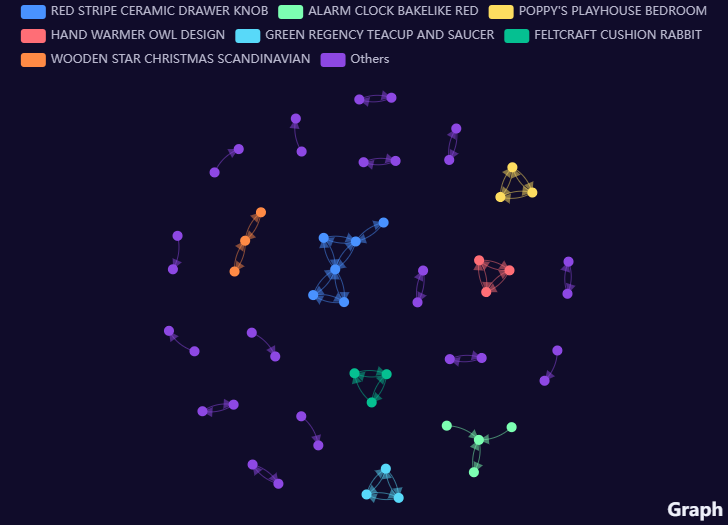

In [280]:
# NOTA! 

# # ◯ Paso 49 (adaptado para Streamlit + Render.com): Interpretación y visualización estática de resultados

# import streamlit as st

# # 🔍 Contexto:
# # En este paso explicamos por qué productos como 
# # **`SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO`** 
# # y **`SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO`** 
# # no aparecen en las reglas de cross-selling, ya que buscamos pares o grupos de productos comprados juntos,
# # más que ítems populares de forma aislada.

# # ✅ Texto explicativo como Markdown en Streamlit
# st.markdown("""
# **Interpretación de los resultados de Cross Selling**

# Con un umbral de confianza media al 50%, productos individuales como 
# **`SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO`**  
# y **`SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO`**  
# no aparecen en las reglas de cross-selling.  
# El objetivo es **identificar pares o grupos de productos** que se compran habitualmente juntos,
# más que destacar artículos populares de forma aislada.
# """)

# # 🖼️ Mostrar la imagen estática exportada en lugar de JupyterEcharts
# # Asegurate de que la imagen esté en 'app/images/' o en la ruta correcta de tu repo
# st.image(
#     "app/images/profile_network.png",
#     caption="Red de productos agrupados por modularidad",
#     use_column_width=True
#)



##  Product Placement with Plotly Heatmap

We can display our products side by side using Plotly heatmap  
📌 Objetivo: visualizar productos que suelen aparecer juntos mediante un heatmap (matriz de co-ocurrencia).

In [281]:
# ◯ Paso 50: Instanciar el generador de heatmap basado en reglas de asociación

# 🧠 Esta clase permite crear una tabla cruzada (crosstab) de productos relacionados,
#     donde las filas y columnas son productos, y los valores reflejan fuerza de asociación.

# ✓ HeatmapCrosstab(rules):
#   - Toma como entrada el conjunto completo de reglas de asociación
#   - Calcula métricas de relación entre pares de productos
#   - Se puede configurar para mostrar diferentes tipos de valores: soporte, confianza, lift, etc.

MyHM = HeatmapCrosstab(rules)

# 🧠 Esto configura el objeto base para los próximos pasos, donde se generará y visualizará un heatmap interactivo usando Plotly.

In [282]:
# ◯ Paso 51: Generar matriz de productos relacionados para visualización con Heatmap

# 🧠 En este paso generamos una tabla cruzada (crosstab) para mostrar
#     cómo se relacionan ciertos productos con otros, usando una métrica específica (en este caso, 'support').

# ✅ Usamos los nombres de productos en español como claves:
# - 'SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO' (WHITE HANGING HEART T-LIGHT HOLDER)
# - 'SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO' (RED HANGING HEART T-LIGHT HOLDER)

tabular = MyHM.get_tabular_data(
    ['SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO', 'SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO'], 
    'support',
    max_col=10  # mostramos solo las 10 columnas más significativas para mantener el heatmap legible
)

In [283]:
# ◯ Paso 52: Visualizar el heatmap de productos con Plotly

# 🧠 Ahora que tenemos la tabla cruzada (`tabular`) con valores de soporte,
#     vamos a crear un heatmap interactivo usando Plotly para mostrar relaciones visuales entre productos.

# Este gráfico es muy útil para:
#     🛒 Visualizar qué productos conviene ubicar cerca en tienda online o física
#     🎯 Detectar oportunidades de promoción cruzada
#     📊 Presentar resultados de forma clara a otras áreas del negocio


# ✓ plot_heatmap(tabular):
#   - Genera un heatmap donde:
#       • Las filas son los productos seleccionados (raíces)
#       • Las columnas son los productos más frecuentemente asociados
#       • El color representa el valor de 'support' (frecuencia conjunta)

fig_heatmap = MyHM.plot_heatmap(tabular)


In [284]:
# ◯ Paso 53: Renderizar el heatmap de productos relacionados (opcional)

# ✅ Este paso muestra el heatmap interactivo generado por Plotly directamente en el notebook.
#    Puede estar comentado para evitar que se renderice automáticamente (útil si estás iterando o exportando).

# 🖼️ Para ver el gráfico en Jupyter, simplemente descomentá la línea de abajo:

# fig_heatmap.show()

In [285]:
## NOTA ! 
## Adaptacion para Render.com
## Este bloque:
##     🔁 Reemplaza .show() por st.plotly_chart(...)
##     🧩 Funciona perfecto dentro de apps en Render
##     📦 Aprovecha todo el interactividad de Plotly sin romper el layout

# # ◯ Paso 53 (versión compatible con Streamlit + Render.com): Mostrar Heatmap de productos

# # ✅ Este bloque es necesario si querés mostrar el heatmap interactivo en una app Streamlit desplegada (por ejemplo, en Render.com).
# #    Reemplaza el uso de `.show()` de Plotly, que solo funciona bien en Jupyter.

# # 1️⃣ Importar el módulo de Streamlit para gráficos Plotly
# import streamlit as st

# # 2️⃣ Mostrar el gráfico dentro del flujo de la app
# st.subheader("🔲 Heatmap de productos frecuentemente comprados juntos")

# # fig_heatmap debe haber sido creado antes con MyHM.plot_heatmap(...)
# st.plotly_chart(fig_heatmap, use_container_width=True)

In [286]:
# ◯ Paso 54: Exportar el heatmap como imagen estática (opcional)

# Con esto podés generar imágenes estáticas como respaldo visual o para mostrar en st.image() más adelante.

# 🖼️ Este paso guarda el gráfico interactivo de Plotly como una imagen .png
#     útil para incluir en presentaciones, informes PDF o apps donde no se puede usar interactividad.

# ❗ Nota: esta línea está comentada porque requiere tener instalado el motor de renderizado 'kaleido'.
#     Si querés habilitarlo, asegurate de:
#     1. Tener kaleido en requirements.txt →    kaleido
#     2. Instalarlo manualmente con:            pip install kaleido

# ✅ Ruta recomendada para mantener todo organizado: /app/images/

# fig_heatmap.write_image("app/images/heatmap_xtab.png")


In [287]:
# # NOTA: Adaptacion para Render.com

# # ◯ Paso 54.1 (versión para Streamlit + Render.com): Mostrar heatmap como imagen estática

# # ✅ Este bloque muestra la imagen del heatmap generada previamente con:
# #    fig_heatmap.write_image("app/images/heatmap_xtab.png")

# # 🧠 Útil si no querés usar interactividad, o como respaldo visual para evitar carga en dispositivos móviles

# import streamlit as st

# st.subheader("🖼️ Heatmap estático de productos frecuentemente comprados juntos")

# # Asegurate de que la imagen haya sido guardada en esa ruta antes
# st.image("app/images/heatmap_xtab.png", caption="Heatmap de co-ocurrencia de productos", use_column_width=True)


In [288]:
# 📌 Recomendación:
# si vas a usar este enfoque, asegurate de guardar la imagen localmente durante desarrollo, 
# y luego incluirla en tu repo para Render.com (ya que Render no genera imágenes dinámicamente sin acceso a Kaleido).

In [289]:
# NOTA! Acerca de Kaleido

### 📌 Nota técnica: Uso opcional de Kaleido para exportar imágenes estáticas con Plotly


# ◯  Uso de Kaleido para exportar gráficos Plotly como imágenes (.png, .pdf, etc.)

# 🧠 ¿Qué es Kaleido?
# - Kaleido es una herramienta gratuita y open source que permite exportar gráficos de Plotly como imágenes estáticas.
# - Soporta formatos como PNG, SVG, PDF y EPS.
# - Se integra automáticamente con Plotly cuando usás .write_image()

# ✅ ¿Por qué usarlo?
# - Ideal para generar gráficos estáticos que puedas:
#     • Incluir en informes PDF
#     • Publicar como imagen en Streamlit usando st.image()
#     • Compartir sin interactividad (ej: email, presentación, impresión)

# ❗ Por defecto, Kaleido NO viene instalado con Plotly
#    Debés instalarlo explícitamente con:
#        pip install kaleido

# 📦 Agregá esta línea en tu archivo requirements.txt si vas a exportar imágenes:
#        kaleido>=0.2.1

# ✅ ¿Por qué no está en el repo original?
# 1. El uso de Kaleido es opcional (solo si necesitás exportar imágenes)
# 2. Muchos proyectos exportan las imágenes una sola vez y las suben estáticas
# 3. Se evita inflar dependencies si el deploy no necesita ese feature
#    (por ejemplo, Render.com solo necesita mostrar st.image(), no regenerar imágenes)

# 📌 Cuándo deberías incluir Kaleido:
# - Si vas a usar fig.write_image(...) dentro de tu código
# - O si querés mantener compatibilidad por si ejecutás notebooks fuera de Jupyter (ej: VS Code)

# ✅ Ejemplo de uso:
#     fig_heatmap.write_image("app/images/heatmap_xtab.png")

# 📌 Verificá que esté instalado:
# try:
#     import kaleido
#     print("✅ Kaleido está instalado y listo para exportar imágenes.")
# except ImportError:
#     print("⚠️ Kaleido no está instalado. Ejecutá: pip install kaleido")



In [290]:
# ### 📌 Nota técnica: Uso opcional de Kaleido para exportar imágenes estáticas con Plotly

# Kaleido permite guardar gráficos interactivos como imágenes (.png, .svg, .pdf)
# Es útil para informes o para mostrar en Streamlit con st.image()

# Instalar con:
#     pip install kaleido

# Agregar a requirements.txt:
#     kaleido>=0.2.1

# Ejemplo de uso:
#     fig.write_image("app/images/graph.png")


In [291]:
# ### 📌 Nota técnica: Uso opcional de streamlit-echarts para visualización interactiva

# Esta librería permite mostrar gráficos ECharts (como redes de productos) directamente en Streamlit.

# Instalar con:
#     pip install streamlit-echarts

# Agregar a requirements.txt:
#     streamlit-echarts>=0.4.0

# Ejemplo de uso:
#     from streamlit_echarts import st_echarts
#     st_echarts(option_dict, height="600px")



In [292]:
# ### 📌 Nota técnica: Uso opcional de Matplotlib para gráficos rápidos y simples

# Aunque Plotly es interactivo, a veces podés necesitar gráficos simples en entorno offline.

# Instalar con:
#     pip install matplotlib

# Agregar a requirements.txt:
#     matplotlib>=3.7.1

# Ejemplo de uso:
#     import matplotlib.pyplot as plt
#     plt.hist(df['support'])
#     plt.show()


In [293]:
# ### 📌 Nota técnica: Despliegue en Render.com (Streamlit App)  --  guía rápida de deploy --

# Render.com es una plataforma que permite desplegar aplicaciones Streamlit de forma gratuita (con ciertas limitaciones).
# Ideal para publicar dashboards o análisis interactivos como el que estás desarrollando.

# ✅ Requisitos básicos para desplegar tu app:
# 1. Tener un archivo principal en /app, por ejemplo:
#        app/market_basket_nav_app.py

# 2. Asegurarte de que esté presente el archivo requirements.txt con todas las dependencias necesarias
#    (puede incluir streamlit, pandas, plotly, streamlit-echarts, etc.)

# 3. En Render, al crear el servicio, usar estos parámetros:
#    - Runtime: Python 3.10+
#    - Start command: streamlit run app/market_basket_nav_app.py
#    - Build command: (vacío o opcionalmente `pip install -r requirements.txt`)

# 🗂️ Organización recomendada del proyecto:
#    /app/               → archivos Python de la app Streamlit
#    /app/images/        → imágenes para mostrar con st.image()
#    /app/models/        → archivos pkl o csv auxiliares
#    /data/processed/    → datasets finales como online_retail_II_translated.csv
#    requirements.txt    → todas las dependencias necesarias para ejecutar

# ⚠️ Limitaciones en Render Free Tier:
# - Tiempo de inactividad si no hay tráfico
# - Límite de 100 MB por archivo estático si no está optimizado
# - No es ideal para exportar imágenes dinámicas (usá imágenes pre-generadas)

# ✅ Para ver logs y depurar errores:
#    - Ingresá a tu servicio en Render → pestaña "Logs"

# Más info:
# https://render.com/docs/deploy-streamlit

# 🎯 Recomendación final:
#     Verificá localmente tu app con:
#         streamlit run app/market_basket_nav_app.py
#     antes de subir a Render para evitar errores de entorno.


![Description](images/heatmap_xtab.png)

## Summary Report

In [294]:
# 🗂️ Guardar el dataframe rules desde tu notebook actual después del paso 54
rules.to_csv("data/processed/summary_rules.csv", index=False)
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,SOPORTE DE PASTELES REGENCY 3 NIVELES,6 CINTAS ENCANTO RÚSTICO,0.0955,0.0426,0.0109,0.1143,2.6800,0.0068,1.0809
1,6 CINTAS ENCANTO RÚSTICO,SOPORTE DE PASTELES REGENCY 3 NIVELES,0.0426,0.0955,0.0109,0.2559,2.6800,0.0068,1.2155
2,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,6 CINTAS ENCANTO RÚSTICO,0.1330,0.0426,0.0121,0.0908,2.1303,0.0064,1.0530
3,6 CINTAS ENCANTO RÚSTICO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,0.0426,0.1330,0.0121,0.2833,2.1303,0.0064,1.2097
4,60 CAJAS DE TARTAS VINTAGE NAVIDAD,KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50,0.0253,0.0491,0.0100,0.3956,8.0489,0.0088,1.5731


### Top 5 Support

In [295]:
# ◯ Paso 55: Reporte resumen — Top 5 reglas por soporte

# 🧠 Este bloque selecciona las 5 reglas con mayor frecuencia conjunta de aparición
#     (es decir, aquellas que más veces se vieron en las transacciones)

# ✓ sort_values('support', ascending=False): ordena todas las reglas desde la más frecuente
# ✓ iloc[::2]: toma una de cada dos (puede usarse para evitar duplicadas en ambos sentidos A→B y B→A)
# ✓ reset_index(drop=True): limpia el índice para visualización más prolija

summary_top_support = rules.sort_values('support', ascending=False).iloc[::2].head(5).reset_index(drop=True)
display(summary_top_support)
summary_top_support.to_csv("data/processed/summary_top_support.csv", index=False)

# 👉 Versión para Streamlit:
# Si estás pensando en mostrar esto en Streamlit como tabla directamente, podrías reemplazar display(...) por:
# import streamlit as st
# st.subheader("🔝 Top 5 Reglas por Soporte")
# st.dataframe(summary_top_support)

# Codigo Original:
# rules.sort_values('support', ascending=False).iloc[::2].head(5).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,SOPORTE T-LIGHT DE CORAZÓN COLGANTE ROJO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,0.0429,0.1330,0.0302,0.7045,5.2984,0.0245,2.9346
1,MARCO DE MADERA ACABADO BLANCO,MARCO DE MADERA BLANCO ANTIGUO,0.0489,0.0501,0.0271,0.5553,11.0746,0.0247,2.1361
2,BOLSA DE ALMACENAMIENTO JUMBO SUKI,BOLSO JUMBO ROJO RETROSPOT,0.0567,0.0797,0.0267,0.4704,5.9012,0.0222,1.7377
3,CAJA DE BARATIJAS DE CERÁMICA DE FRESA,CAJA DE BARATIJAS DE CERÁMICA SWEETHEART,0.0563,0.0361,0.0256,0.4554,12.6178,0.0236,1.7700
4,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0327,0.0344,0.0249,0.7625,22.1884,0.0238,4.0654


In [296]:
# ✅ VL: Código para calcular mean_rank y mostrar el Top 5:

# Paso 1: Calcular el ranking individual para cada métrica
rules["support_rank"] = rules["support"].rank(ascending=False)
rules["confidence_rank"] = rules["confidence"].rank(ascending=False)
rules["lift_rank"] = rules["lift"].rank(ascending=False)

# Paso 2: Calcular el promedio de los rankings
rules["mean_rank"] = rules[["support_rank", "confidence_rank", "lift_rank"]].mean(axis=1)

# Paso 3: Ordenar por mean_rank (el menor es mejor)
rules_w_Score = rules.sort_values(by="mean_rank").reset_index(drop=True)

# Mostrar tabla extendida con rankings detallados
print("🔍 Detalle de métricas y rankings para todas las reglas ordenadas por 'mean_rank':")
display(rules_w_Score[[
    "antecedents", "consequents", "support", "support_rank",
    "confidence", "confidence_rank", "lift", "lift_rank",
    "mean_rank"
]])

# Mostrar Top 5 reglas con mejores puntuaciones
top_5_rules = rules_w_Score.sort_values(by="mean_rank").head(5)[[
    "antecedents", "consequents", "support",
    "confidence", "lift"
]]

print("\n🏆 Top 5 reglas de asociación con mejor rendimiento compuesto (menor 'mean_rank'):")
display(top_5_rules)

🔍 Detalle de métricas y rankings para todas las reglas ordenadas por 'mean_rank':


,antecedents,consequents,support,support_rank,confidence,confidence_rank,lift,lift_rank,mean_rank
0,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0249,9.5000,0.7625,8.0000,22.1884,51.0000,22.8333
1,TAZA DE TÉ Y PLATILLO ROSES REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0249,9.5000,0.7257,13.0000,22.1884,52.0000,24.8333
2,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0208,37.5000,0.8341,2.0000,25.5033,40.0000,26.5000
3,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSA REGENCY,0.0208,37.5000,0.6366,32.0000,25.5033,39.0000,36.1667
4,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0196,59.5000,0.7854,6.0000,22.8546,50.0000,38.5000
...,...,...,...,...,...,...,...,...,...
643,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,FELPUDO BANDERA DE LA UNIÓN,0.0104,568.5000,0.0784,644.5000,1.9320,611.5000,608.1667
644,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,REX CASH+CARRY JUMBO SHOPPER,0.0105,555.5000,0.0789,643.0000,1.7032,633.5000,610.6667
645,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50,0.0105,550.5000,0.0791,642.0000,1.6099,645.5000,612.6667
646,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,BOLSO JUMBO PAISLEY VINTAGE ROSA,0.0103,596.5000,0.0775,646.0000,1.9649,607.5000,616.6667



🏆 Top 5 reglas de asociación con mejor rendimiento compuesto (menor 'mean_rank'):


,antecedents,consequents,support,confidence,lift
0,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0249,0.7625,22.1884
1,TAZA DE TÉ Y PLATILLO ROSES REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0249,0.7257,22.1884
2,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0208,0.8341,25.5033
3,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSA REGENCY,0.0208,0.6366,25.5033
4,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0196,0.7854,22.8546


In [297]:
print(rules_w_Score.columns)

Index(['antecedents', 'consequents', 'antecedent support',
       'consequent support', 'support', 'confidence', 'lift', 'leverage',
       'conviction', 'support_rank', 'confidence_rank', 'lift_rank',
       'mean_rank'],
      dtype='object')


In [298]:
# ✅ VL: Código para agregar la columna "Score" (posición final):

# Agregar columna 'Score' como ranking basado en mean_rank
rules_w_Score["Score"] = rules_w_Score["mean_rank"].rank(method="first", ascending=True).astype(int)

# Reordenar las columnas dejando 'Score' al final y excluyendo 'mean_rank'
columns_to_show = [
    "antecedents", "consequents", "support",
    "confidence", "lift", "Score"
]

# Reordenar las reglas por Score
top_rules_sorted = rules_w_Score.sort_values(by="Score").reset_index(drop=True)


# Mostrar la tabla final
rules_w_Score = rules_w_Score[columns_to_show]

print("🏆 Reglas de asociación con score final (sin mostrar mean_rank):")
display(rules_w_Score)
 



🏆 Reglas de asociación con score final (sin mostrar mean_rank):


,antecedents,consequents,support,confidence,lift,Score
0,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0249,0.7625,22.1884,1
1,TAZA DE TÉ Y PLATILLO ROSES REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0249,0.7257,22.1884,2
2,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0208,0.8341,25.5033,3
3,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSA REGENCY,0.0208,0.6366,25.5033,4
4,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0196,0.7854,22.8546,5
...,...,...,...,...,...,...
643,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,FELPUDO BANDERA DE LA UNIÓN,0.0104,0.0784,1.9320,644
644,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,REX CASH+CARRY JUMBO SHOPPER,0.0105,0.0789,1.7032,645
645,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50,0.0105,0.0791,1.6099,646
646,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,BOLSO JUMBO PAISLEY VINTAGE ROSA,0.0103,0.0775,1.9649,647


In [299]:
Top_5_Rules_by_Score = rules_w_Score.iloc[::2].head(5).reset_index(drop=True) #✓ iloc[::2]: toma una de cada dos (puede usarse para evitar duplicadas en ambos sentidos A→B y B→A)
Top_5_Rules_by_Score.to_csv("data/processed/Top_5_Rules_by_Score.csv", index=False)

print("🏆Top_5_Rules_by_Score evita duplicados en ambos sentidos A→B y B→A:")
display(Top_5_Rules_by_Score)

🏆Top_5_Rules_by_Score evita duplicados en ambos sentidos A→B y B→A:


,antecedents,consequents,support,confidence,lift,Score
0,TAZA DE TÉ Y PLATILLO VERDE REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0249,0.7625,22.1884,1
1,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO VERDE REGENCY,0.0208,0.8341,25.5033,3
2,TAZA DE TÉ Y PLATILLO ROSA REGENCY,TAZA DE TÉ Y PLATILLO ROSES REGENCY,0.0196,0.7854,22.8546,5
3,DESPERTADOR BAKELIKE ROJO,DESPERTADOR BAKELIKE VERDE,0.0204,0.6134,19.7839,7
4,LONCHERA DOLLY GIRL,LONCHERA SPACEBOY,0.0202,0.6214,18.6527,9


In [300]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_rank,confidence_rank,lift_rank,mean_rank
0,SOPORTE DE PASTELES REGENCY 3 NIVELES,6 CINTAS ENCANTO RÚSTICO,0.0955,0.0426,0.0109,0.1143,2.6800,0.0068,1.0809,489.5000,604.0000,557.5000,550.3333
1,6 CINTAS ENCANTO RÚSTICO,SOPORTE DE PASTELES REGENCY 3 NIVELES,0.0426,0.0955,0.0109,0.2559,2.6800,0.0068,1.2155,489.5000,453.0000,557.5000,500.0000
2,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,6 CINTAS ENCANTO RÚSTICO,0.1330,0.0426,0.0121,0.0908,2.1303,0.0064,1.0530,336.5000,623.0000,597.5000,519.0000
3,6 CINTAS ENCANTO RÚSTICO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,0.0426,0.1330,0.0121,0.2833,2.1303,0.0064,1.2097,336.5000,414.0000,597.5000,449.3333
4,60 CAJAS DE TARTAS VINTAGE NAVIDAD,KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50,0.0253,0.0491,0.0100,0.3956,8.0489,0.0088,1.5731,644.5000,241.0000,287.5000,391.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,TIRITAS EN CALAVERAS DE HOJALATA,TIRITAS EN HOJALATA SPACEBOY,0.0266,0.0316,0.0105,0.3941,12.4585,0.0096,1.5983,559.5000,242.0000,151.5000,317.6667
644,TIRITAS EN HOJALATA STRONGMAN,TIRITAS EN HOJALATA SPACEBOY,0.0233,0.0316,0.0101,0.4351,13.7548,0.0094,1.7144,620.5000,170.0000,123.0000,304.5000
645,TIRITAS EN HOJALATA SPACEBOY,TIRITAS EN HOJALATA STRONGMAN,0.0316,0.0233,0.0101,0.3202,13.7548,0.0094,1.4369,620.5000,355.0000,124.0000,366.5000
646,TIROS EN HOJALATA VINTAGE PAISLEY,TIRITAS EN HOJALATA SPACEBOY,0.0274,0.0316,0.0110,0.4005,12.6607,0.0101,1.6154,473.5000,231.0000,142.0000,282.1667


In [301]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,support_rank,confidence_rank,lift_rank,mean_rank
0,SOPORTE DE PASTELES REGENCY 3 NIVELES,6 CINTAS ENCANTO RÚSTICO,0.0955,0.0426,0.0109,0.1143,2.6800,0.0068,1.0809,489.5000,604.0000,557.5000,550.3333
1,6 CINTAS ENCANTO RÚSTICO,SOPORTE DE PASTELES REGENCY 3 NIVELES,0.0426,0.0955,0.0109,0.2559,2.6800,0.0068,1.2155,489.5000,453.0000,557.5000,500.0000
2,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,6 CINTAS ENCANTO RÚSTICO,0.1330,0.0426,0.0121,0.0908,2.1303,0.0064,1.0530,336.5000,623.0000,597.5000,519.0000
3,6 CINTAS ENCANTO RÚSTICO,SOPORTE T-LIGHT DE CORAZÓN COLGANTE BLANCO,0.0426,0.1330,0.0121,0.2833,2.1303,0.0064,1.2097,336.5000,414.0000,597.5000,449.3333
4,60 CAJAS DE TARTAS VINTAGE NAVIDAD,KIT DE CADENA DE PAPEL NAVIDAD AÑOS 50,0.0253,0.0491,0.0100,0.3956,8.0489,0.0088,1.5731,644.5000,241.0000,287.5000,391.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,TIRITAS EN CALAVERAS DE HOJALATA,TIRITAS EN HOJALATA SPACEBOY,0.0266,0.0316,0.0105,0.3941,12.4585,0.0096,1.5983,559.5000,242.0000,151.5000,317.6667
644,TIRITAS EN HOJALATA STRONGMAN,TIRITAS EN HOJALATA SPACEBOY,0.0233,0.0316,0.0101,0.4351,13.7548,0.0094,1.7144,620.5000,170.0000,123.0000,304.5000
645,TIRITAS EN HOJALATA SPACEBOY,TIRITAS EN HOJALATA STRONGMAN,0.0316,0.0233,0.0101,0.3202,13.7548,0.0094,1.4369,620.5000,355.0000,124.0000,366.5000
646,TIROS EN HOJALATA VINTAGE PAISLEY,TIRITAS EN HOJALATA SPACEBOY,0.0274,0.0316,0.0110,0.4005,12.6607,0.0101,1.6154,473.5000,231.0000,142.0000,282.1667


### Bundle Products
este bloque es muy valioso para mostrar los bundles o grupos de productos relacionados por modularidad.   
Esto es perfecto para mostrar a gerencia o al equipo de producto qué grupos de artículos suelen aparecer juntos de forma consistente.  
¿Te gustaría destacar uno visualmente como ejemplo con st.markdown() o armar un botón tipo “Ver grupo destacado”?

In [302]:
# ◯ Paso 56: Reporte resumen — Productos agrupados por bundle (comunidades)

# 🧠 Este bloque agrupa los productos por su categoría modular detectada por NxGrouper,
#     y calcula para cada grupo:
#     - products: lista de productos únicos en ese grupo
#     - support_mean: promedio del soporte dentro del grupo
#     - n: cantidad total de productos en el grupo

summary_bundles = df_bundle_products.groupby('category').agg(
    products=('nodes', 'unique'), 
    support_mean=('support', 'mean'), 
    n=('nodes', 'size')
).sort_values('support_mean', ascending=False)

summary_bundles.to_csv("data/processed/summary_bundles.csv", index=False)

display(summary_bundles)


# 👉 Versión para Streamlit:
# import streamlit as st
# st.subheader("🧩 Bundle de Productos (Agrupación por Modularidad)")
# st.dataframe(summary_bundles)



# # codigo original:
# df_bundle_products.groupby('category').agg(
#     products=('nodes', 'unique'), 
#     support_mean=('support', 'mean'), 
#     n=('nodes', 'size')
# ).sort_values('support_mean', ascending=False)

,products,support_mean,n
category,,,
TAZA DE TÉ Y PLATILLO VERDE REGENCY,"[TAZA DE TÉ Y PLATILLO VERDE REGENCY, TAZA DE TÉ Y PLATILLO ROSES REGENCY, TAZA DE TÉ Y PLATILLO ROSA REGENCY]",0.0307,3
CALENTADOR DE MANOS DISEÑO OWL,"[CALENTADOR DE MANOS DISEÑO OWL, CALENTADOR DE MANOS DISEÑO DE PÁJARO, CALENTADOR DE MANOS SCOTTY DOG DESIGN]",0.0272,3
DESPERTADOR BAKELIKE ROJO,"[DESPERTADOR BAKELIKE ROJO, DESPERTADOR BAKELIKE VERDE, DESPERTADOR BAKELIKE ROSA, DESPERTADOR BAKELIKE IVORY]",0.0265,4
CONEJO COJÍN FELTCRAFT,"[CONEJO COJÍN FELTCRAFT, FELTCRAFT COJÍN BÚHO, FELTCRAFT COJÍN MARIPOSA]",0.0200,3
POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS,"[POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS, POMO DE CAJÓN CERÁMICO BLUE SPOT, POMO DE CAJÓN CERÁMICO ROJO MANCHA BLANCA, POMO DE CAJÓN CERÁMICO DE RAYAS AZULES, POMO DE CAJÓN CERÁMICO RED SPOT, POMO DE CAJÓN CERÁMICO AZUL MANCHA BLANCA]",0.0191,6
ESTRELLA DE MADERA NAVIDAD ESCANDINAVA,"[ESTRELLA DE MADERA NAVIDAD ESCANDINAVA, CORAZÓN DE MADERA NAVIDAD ESCANDINAVO, ÁRBOL DE MADERA NAVIDAD ESCANDINAVO]",0.0174,3
DORMITORIO DE POPPY'S PLAYHOUSE,"[DORMITORIO DE POPPY'S PLAYHOUSE, LA COCINA DE POPPY'S PLAYHOUSE, SALÓN DE LA CASA DE JUEGOS DE POPPY]",0.0163,3


### Product Layout
Este bloque comienza a focalizar en un grupo específico de productos — ideal para mostrar cómo podrías organizar visualmente una sección de la tienda o pensar una estrategia de layout.

In [303]:
# ◯ Paso 57: Reporte resumen — Selección de un bundle para análisis de layout

# 🧠 Este bloque filtra un grupo de productos relacionados entre sí,
#     usando una categoría modular como referencia clave.
#     Luego, extrae los nombres de productos incluidos en ese grupo.

# ✅ Esto es útil para:
#   - Generar una sugerencia de layout o sección de tienda
#   - Mostrar visualmente un "bundle" específico al usuario final

PRODUCTS_CATEGORY = "POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS"
    # POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS = RED STRIPE CERAMIC DRAWER KNOB

# ✓ Filtrar nodos que pertenecen al grupo que contiene ese producto

products_bundles = df_bundle_products[
    df_bundle_products['category'].str.contains(PRODUCTS_CATEGORY)
]['nodes'].values

display(products_bundles)

# 👉 Versión Streamlit:
# import streamlit as st
# st.subheader("🛍️ Bundle relacionado: Pomo de Cajón Cerámico de Rayas Rojas")
# # Mostrar lista de productos agrupados en ese bundle
# if len(products_bundles) > 0:
#     st.markdown("**Productos agrupados en este bundle:**")
#     st.write(list(products_bundles[0]))
# else:
#     st.warning("No se encontraron productos relacionados con esta categoría.")


# Codigo Original:
# PRODUCTS_CATEGORY = "RED STRIPE CERAMIC DRAWER KNOB"
# products_bundles = df_bundle_products[df_bundle_products['category'].str.contains(PRODUCTS_CATEGORY)]['nodes'].values

array(['POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS',
       'POMO DE CAJÓN CERÁMICO BLUE SPOT',
       'POMO DE CAJÓN CERÁMICO ROJO MANCHA BLANCA',
       'POMO DE CAJÓN CERÁMICO DE RAYAS AZULES',
       'POMO DE CAJÓN CERÁMICO RED SPOT',
       'POMO DE CAJÓN CERÁMICO AZUL MANCHA BLANCA'], dtype=object)

In [304]:
# ◯ Paso 58: Generar tabla cruzada (crosstab) del bundle seleccionado

# 🧠 Este paso toma los productos agrupados en el bundle que incluye
#     "POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS" y genera una tabla de co-ocurrencia.

# ✓ get_tabular_data(...):
#   - products: lista de productos a usar como filas
#   - metric: 'support' mide la frecuencia conjunta
#   - max_col: limita la cantidad de columnas a mostrar (productos más frecuentes)
#   - personal_placement=False: usa layout general, no personalizado

tabular = MyHM.get_tabular_data(
    products_bundles, 
    'support',
    max_col=10,
    personal_placement=False
)

display (tabular)
tabular.to_csv("data/processed/tabular_bundle.csv")


support,POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS,POMO DE CAJÓN CERÁMICO BLUE SPOT,POMO DE CAJÓN CERÁMICO DE RAYAS AZULES,POMO DE CAJÓN CERÁMICO RED SPOT,POMO DE CAJÓN CERÁMICO ROJO MANCHA BLANCA,POMO DE CAJÓN CERÁMICO AZUL MANCHA BLANCA
antecedents,,,,,,
POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS,NaN,0.0101,0.0121,0.0110,0.0107,NaN
POMO DE CAJÓN CERÁMICO BLUE SPOT,0.0101,NaN,0.0101,NaN,NaN,0.0104
POMO DE CAJÓN CERÁMICO DE RAYAS AZULES,0.0121,0.0101,NaN,NaN,NaN,NaN
POMO DE CAJÓN CERÁMICO RED SPOT,0.0110,NaN,NaN,NaN,0.0104,NaN
POMO DE CAJÓN CERÁMICO ROJO MANCHA BLANCA,0.0107,NaN,NaN,0.0104,NaN,NaN
POMO DE CAJÓN CERÁMICO AZUL MANCHA BLANCA,NaN,0.0104,NaN,NaN,NaN,NaN


In [305]:
# ◯ Paso 59: Visualizar heatmap del bundle seleccionado
# Este paso es muy valioso si querés ayudar al usuario a visualizar asociaciones clave dentro de un conjunto de productos.

# 🧠 Este paso crea un heatmap con Plotly para mostrar:
#   - En filas: los productos del bundle (ej. productos similares a POMO DE CAJÓN CERÁMICO DE RAYAS ROJAS)
#   - En columnas: los productos más frecuentemente co-comprados
#   - En celdas: el valor de 'support' (frecuencia conjunta de compra)

import plotly.graph_objects as go
import numpy as np

# Matriz de soporte
z = tabular.values

# Etiquetas para columnas y filas
x_labels = tabular.columns.tolist()
y_labels = tabular.index.tolist()

# Crear el heatmap desde cero
fig = go.Figure(data=go.Heatmap(
    z=z,
    x=x_labels,
    y=y_labels,
    colorscale='Reds',
    hoverongaps=False,
    text=z.round(3),
    texttemplate="%{text}",  # muestra el valor directamente en la celda
    hovertemplate="Producto A: %{y}<br>Producto B: %{x}<br>Soporte: %{z}<extra></extra>"
))

# Ajustar layout para etiquetas largas
fig.update_layout(
    title="Heatmap de soporte entre productos del bundle",
    height=900,
    xaxis_tickangle=-45,
    xaxis=dict(tickfont=dict(size=10), automargin=True),
    yaxis=dict(tickfont=dict(size=10), automargin=True),
    margin=dict(l=200, r=50, t=50, b=200)
)
# ✓ Visualizar el gráfico (en Jupyter)
fig.show()


# 👉 Versión Streamlit:
# import streamlit as st

# st.subheader("🔥 Heatmap del Bundle Seleccionado")
# st.plotly_chart(fig, use_container_width=True)

# TESTING:

### 🔬 Sección FINAL — Testing: Exploración de DataFrames activos

In [306]:
import pandas as pd
import inspect

# ◯ Diccionario de etiquetas manuales por DataFrame
etiquetas_contexto = {
    "rules": "reglas Apriori",
    "rules_bfs": "reglas en red BFS",
    "df_edges_profile": "grafo perfil",
    "df_edges_pn": "grafo producto",
    "cross_selling_rules": "cross selling",
    "top_cross": "top cross selling",
    "df_nodes_pn": "nodos de producto",
    "df_bfs": "camino más corto",
    "Top_5_Rules_by_Score": "resumen top reglas",
    "summary_bundles": "productos agrupados"
}

# ◯ Congelar los elementos actuales de globals()
elementos = list(globals().items())

df_resumen = []

# ◯ Iterar de forma segura
for nombre, obj in elementos:
    if isinstance(obj, pd.DataFrame) and not nombre.startswith("_"):
        try:
            origen = inspect.getsourcefile(obj.__class__)
        except TypeError:
            origen = "desconocido"

        df_resumen.append({
            "Nombre": nombre,
            "Filas": obj.shape[0],
            "Columnas": obj.shape[1],
            "Contexto": etiquetas_contexto.get(nombre, "—")
        })

# ◯ Mostrar el resumen en orden de creación
df_inspeccion = pd.DataFrame(df_resumen).reset_index(drop=True)
print("🔍 DataFrames activos en memoria (ordenados por creación):")
display(df_inspeccion)


🔍 DataFrames activos en memoria (ordenados por creación):


,Nombre,Filas,Columnas,Contexto
0,df,997091,2,—
1,one_hot_transactions,41061,5576,—
2,frequent_itemsets,997,2,—
3,rules,648,13,reglas Apriori
4,df_nodes_profile,168,7,—
5,df_edges_profile,648,10,grafo perfil
6,df_bfs,15,9,camino más corto
7,rules_bfs,141,9,reglas en red BFS
8,df_nodes_pn,15,15,nodos de producto
9,df_edges_pn,14,11,grafo producto
